In [1]:
#Split location-only results by MA and cone angle.

import pandas as pd
import numpy as np
import datetime as dt
import glob

from XMA_finder import XMA_finder
#from histo_plot_lower_vmax import histo_plot
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec

#import modules
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib import cm
import matplotlib.colors as colors
import matplotlib
from merka05_surface_eq_array_GIPM import merka05_surface_eq_array_GIPM
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib.ticker as ticker
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyBboxPatch
import matplotlib.gridspec as gridspec
from matplotlib.transforms import TransformedBbox

#import cmcrameri.cm as cmc

#cmap=cmc.batlow

In [2]:
XMA_all = 10

In [3]:
#import C1/C2/C3/C4 csvs and determine min/max power
#then go back to update the colourmap norm choice

##load Cluster CSVs

cl_file_list = []

path = "/Users/roseatkinson/Documents/Cluster_Integrated_CSVs/**"

for path in glob.glob(path, recursive=True):
    if '.csv' in path:
        cl_file_list.append(path)
    
cl_23_dfs = []

for file in cl_file_list:
    df = pd.read_csv(file,encoding='utf-8')
    df['datetime'] = pd.to_datetime(df['datetime'], format='mixed')
    df.set_index('datetime', inplace = True)
    cl_23_dfs.append(df)

cl_power_all = pd.concat(cl_23_dfs)

#Filtering: remove OMNI too far, current sheets, & null GIPM entries
cl_filtered = cl_power_all.loc[(cl_power_all['OMNI Dist from X line (mean)'] < 70) & (cl_power_all['Max IMF Deviation'] < 60) & (cl_power_all['GIPM X (OMNI mean)'].notnull())]

In [4]:
cl_filtered_lowZ = cl_filtered.loc[(cl_filtered['GIPM Z (OMNI mean)'] < 5) & (cl_filtered['GIPM Z (OMNI mean)'] > -5)]

In [5]:
#coverage histograms

#split by MA & CA

df_radial = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] < 30)]
df_lowspiral = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 30) & (cl_filtered_lowZ['cone angle (mean)'] < 45)]
df_highspiral = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 45) & (cl_filtered_lowZ['cone angle (mean)'] < 60)]
df_lowperpendicular = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 60) & (cl_filtered_lowZ['cone angle (mean)'] < 75)]
df_highperpendicular = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 75)]

#create compressibility column for each dataframe
df_list = [df_radial, df_lowspiral, df_highspiral, df_lowperpendicular, df_highperpendicular]

for df in df_list:
    df.loc[:, 'Compressibility'] = (
        df['ULF Band Normalised Compressive Power'] /
        df['ULF Band Normalised Transverse Power']
    )
    
#radial
df_rad_less5 = df_radial.loc[(df_radial['M_A (mean)'] < 5)]
df_rad_5_10 = df_radial.loc[((df_radial['M_A (mean)'] >= 5) & (df_radial['M_A (mean)'] < 10))]
df_rad_10_15 = df_radial.loc[((df_radial['M_A (mean)'] >= 10) & (df_radial['M_A (mean)'] < 15))]
df_rad_15more = df_radial.loc[(df_radial['M_A (mean)'] >= 15)]

#lowspiral 

df_lowspir_less5 = df_lowspiral.loc[(df_lowspiral['M_A (mean)'] < 5)]
df_lowspir_5_10 = df_lowspiral.loc[((df_lowspiral['M_A (mean)'] >= 5) & (df_lowspiral['M_A (mean)'] < 10))]
df_lowspir_10_15 = df_lowspiral.loc[((df_lowspiral['M_A (mean)'] >= 10) & (df_lowspiral['M_A (mean)'] < 15))]
df_lowspir_15more = df_lowspiral.loc[(df_lowspiral['M_A (mean)'] >= 15)]

#highspiral 

df_highspir_less5 = df_highspiral.loc[(df_highspiral['M_A (mean)'] < 5)]
df_highspir_5_10 = df_highspiral.loc[((df_highspiral['M_A (mean)'] >= 5) & (df_highspiral['M_A (mean)'] < 10))]
df_highspir_10_15 = df_highspiral.loc[((df_highspiral['M_A (mean)'] >= 10) & (df_highspiral['M_A (mean)'] < 15))]
df_highspir_15more = df_highspiral.loc[(df_highspiral['M_A (mean)'] >= 15)]

#lowperpendicular

df_lowperp_less5 = df_lowperpendicular.loc[(df_lowperpendicular['M_A (mean)'] < 5)]
df_lowperp_5_10 = df_lowperpendicular.loc[((df_lowperpendicular['M_A (mean)'] >= 5) & (df_lowperpendicular['M_A (mean)'] < 10))]
df_lowperp_10_15 = df_lowperpendicular.loc[((df_lowperpendicular['M_A (mean)'] >= 10) & (df_lowperpendicular['M_A (mean)'] < 15))]
df_lowperp_15more = df_lowperpendicular.loc[(df_lowperpendicular['M_A (mean)'] >= 15)]

#highperpendicular

df_highperp_less5 = df_highperpendicular.loc[(df_highperpendicular['M_A (mean)'] < 5)]
df_highperp_5_10 = df_highperpendicular.loc[((df_highperpendicular['M_A (mean)'] >= 5) & (df_highperpendicular['M_A (mean)'] < 10))]
df_highperp_10_15 = df_highperpendicular.loc[((df_highperpendicular['M_A (mean)'] >= 10) & (df_highperpendicular['M_A (mean)'] < 15))]
df_highperp_15more = df_highperpendicular.loc[(df_highperpendicular['M_A (mean)'] >= 15)]

/var/folders/s1/0bdd70ss1sl0l4506262hgm00000gr/T/ipykernel_35029/4154687313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Compressibility'] = (
/var/folders/s1/0bdd70ss1sl0l4506262hgm00000gr/T/ipykernel_35029/4154687313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Compressibility'] = (
/var/folders/s1/0bdd70ss1sl0l4506262hgm00000gr/T/ipykernel_35029/4154687313.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [6]:
x_bin_edges = range(20)
y_bin_edges = range(-20, 20)

_, xedg, yedg = np.histogram2d(
        df_radial['GIPM X (OMNI mean)'].to_numpy(),
        df_radial['GIPM Y (OMNI mean)'].to_numpy(),
        bins=[x_bin_edges, y_bin_edges]
    )

#updated to include heatmaps, with bins w/ under 50 obs removed.

def compute_hists2d(df):
    """Compute transposed 2D histogram with zeros replaced by NaN."""
    x_col='GIPM X (OMNI mean)'
    y_col='GIPM Y (OMNI mean)'
    w_compressive='ULF Band Normalised Compressive Power'
    w_transverse='ULF Band Normalised Transverse Power'
    w_compressible='Compressibility'
    
    hist, _, _ = np.histogram2d(
        df[x_col].to_numpy(),
        df[y_col].to_numpy(),
        bins=[x_bin_edges, y_bin_edges]
    )
    hist = hist.T
    hist[hist == 0] = np.nan

    #produce a copy of count distribution histogram for masking purposes
    hist_count = hist.copy()
    hist_count[hist_count < 50] = np.nan

    #compressive power histogram
    hist_comp, _, _ = np.histogram2d(
        df[x_col].to_numpy(),
        df[y_col].to_numpy(),
        bins=[x_bin_edges, y_bin_edges],
        weights=df[w_compressive].to_numpy()
    )
    hist_comp = hist_comp.T
    hist_comp[hist_comp == 0] = np.nan
    #normalise to find averages
    hist_comp = hist_comp/hist_count

    #transverse power histogram
    hist_trans, _, _ = np.histogram2d(
        df[x_col].to_numpy(),
        df[y_col].to_numpy(),
        bins=[x_bin_edges, y_bin_edges],
        weights=df[w_transverse].to_numpy()
    )
    hist_trans = hist_trans.T
    hist_trans[hist_trans == 0] = np.nan
    #normalise to find averages
    hist_trans = hist_trans/hist_count

    #compressibility histogram
    hist_compressibility, _, _ = np.histogram2d(
        df[x_col].to_numpy(),
        df[y_col].to_numpy(),
        bins=[x_bin_edges, y_bin_edges],
        weights=df[w_compressible].to_numpy()
    )
    hist_compressibility = hist_compressibility.T
    hist_compressibility[hist_compressibility == 0] = np.nan
    #normalise to find averages
    hist_compressibility = hist_compressibility/hist_count
    
    return hist, hist_comp, hist_trans, hist_compressibility

data_groups = {
    "rad": {
        "less5": df_rad_less5,
        "5_10": df_rad_5_10,
        "10_15": df_rad_10_15,
        "15more": df_rad_15more,
    },
    "lowspir": {
        "less5": df_lowspir_less5,
        "5_10": df_lowspir_5_10,
        "10_15": df_lowspir_10_15,
        "15more": df_lowspir_15more,
    },
    "highspir": {
        "less5": df_highspir_less5,
        "5_10": df_highspir_5_10,
        "10_15": df_highspir_10_15,
        "15more": df_highspir_15more,
    },
    "lowperp": {
        "less5": df_lowperp_less5,
        "5_10": df_lowperp_5_10,
        "10_15": df_lowperp_10_15,
        "15more": df_lowperp_15more,
    },
    "highperp": {
        "less5": df_highperp_less5,
        "5_10": df_highperp_5_10,
        "10_15": df_highperp_10_15,
        "15more": df_highperp_15more,
    }
}

histograms = {}
compressive_heatmap = {}
transverse_heatmap = {}
compressibility_heatmap = {}

for group_name, subsets in data_groups.items():
    histograms[group_name] = {}
    compressive_heatmap[group_name] = {}
    transverse_heatmap[group_name] = {}
    compressibility_heatmap[group_name] = {}
    for subset_name, df in subsets.items():
        histograms[group_name][subset_name], compressive_heatmap[group_name][subset_name], transverse_heatmap[group_name][subset_name], compressibility_heatmap[group_name][subset_name] = compute_hists2d(df)

In [41]:
#Shue magnetopause model, D = 1.76 nPa

m_1 = 10.22
m_2 = 1.29
m_3 = 0.184
m_4 = 8.14
m_5 = 6.6
m_6 = 0.58
m_7 = -0.007
m_8 = 0.024

#use B_z = 0
B_z = 0
D_p = 1.76

alpha = (m_6 + m_7*B_z)*(1 +m_8*(np.log(D_p)))

tanh_angle = m_3*(B_z+m_4)
r_0 = (m_1 + m_2*np.tanh(tanh_angle))*(D_p**(-1/m_5))

pi = np.pi

theta = np.arange(-pi/2, pi/2, 0.01)

r_mod = (2/(1+np.cos(theta)))**alpha
r = r_0*r_mod

X_shue = r*(np.cos(theta))
R_shue = r*(np.sin(theta))

#make a coverage plot

x = np.linspace(0, 20, 100) #x coordinates (Re)
y = np.linspace(-30, 30, 100) #y coordinates (Re)
z = 0 #z coordinates in Re

[Xgipm,Ygipm,Zgipm] = np.meshgrid(x,y,z,indexing="ij")

fitting_coeffs = merka05_surface_eq_array_GIPM(XMA_all)

Xn = Xgipm
Yn = Ygipm
Zn = Zgipm
f = fitting_coeffs[0]*Xn**2 + fitting_coeffs[1]*Yn**2 + fitting_coeffs[2]*Zn**2+ 2*fitting_coeffs[3]*Xn*Yn + 2*fitting_coeffs[4]*Yn*Zn + 2*fitting_coeffs[5]*Xn*Zn + 2*fitting_coeffs[6]*Xn+2*fitting_coeffs[7]*Yn + 2*fitting_coeffs[8]*Zn + fitting_coeffs[9]


# -------------------------------
# Helper functions
# -------------------------------

def draw_background(ax, xg, yg, f, x_shue, r_shue):
    """Draw magnetopause, bow shock + y=0 line"""
    ax.contour(xg, yg, f, levels=[0], colors="black", linewidths=1)
    ax.plot(x_shue, r_shue, 'k', linewidth=1)
    ax.hlines(0, 0, 25, color='k', linewidth=1)


def draw_hist(ax, hist, extent, cmap, angle_line):
    """Draw heatmap + flow line"""
    ax.imshow(hist, interpolation='none', origin='lower',
              extent=extent, cmap=cmap, vmin=50, vmax=300)
    
    x_s, x_e, y_s, y_e = angle_line
    ax.plot([x_s, x_e], [y_s, angle_line[3]], color='k', linewidth=1)

def set_limits(ax):
    ax.set_xlim(0, 20)
    ax.set_ylim(-20, 20)
    ax.invert_xaxis()
    ax.invert_yaxis()
    ax.set_aspect('equal')

# -------------------------------
# PRECOMPUTED CONSTANTS
# -------------------------------

# Bow shock intercept
inter_med = fitting_coeffs[6]**2 - (fitting_coeffs[0]*fitting_coeffs[9])
x_s = (-fitting_coeffs[6] + np.sqrt(inter_med)) / fitting_coeffs[0]
x_e = 30
y_s = 0

# Line slopes for different angle classes
line_slopes = {
    "0–30°": np.tan(np.deg2rad(15)),
    "30–45°": np.tan(np.deg2rad(37.5)),
    "45–60°": np.tan(np.deg2rad(52.5)),
    "60–75°": np.tan(np.deg2rad(67.5)),
    "75–90°": np.tan(np.deg2rad(82.5)),
    "30-52.5°": np.tan(np.deg2rad(41.25)),
    "52.5-75°": np.tan(np.deg2rad(63.75)),
}

hist_blocks = [
    [histograms["rad"]["15more"], histograms["lowspir"]["15more"], histograms["highspir"]["15more"], histograms["lowperp"]["15more"], histograms["highperp"]["15more"]],
    [histograms["rad"]["10_15"], histograms["lowspir"]["10_15"], histograms["highspir"]["10_15"], histograms["lowperp"]["10_15"], histograms["highperp"]["10_15"]],
    [histograms["rad"]["5_10"], histograms["lowspir"]["5_10"], histograms["highspir"]["5_10"], histograms["lowperp"]["5_10"], histograms["highperp"]["5_10"]],
    [histograms["rad"]["less5"], histograms["lowspir"]["less5"], histograms["highspir"]["less5"], histograms["lowperp"]["less5"], histograms["highperp"]["less5"]]
    
]


histograms["rad"]["less5"]
angle_titles = ["0–30°", "30–45°", "45–60°", "60–75°", "75–90°"]

# Heatmap extent (assuming X/Y are same for all)
extent = [xedg[0], xedg[-1], yedg[0], yedg[-1]]


def mask_inside_magnetopause(ax, x_shue, r_shue):
    """
    Mask (fill white) the region inside the magnetopause and bounded by x=0.
    
    Parameters
    ----------
    ax : matplotlib axis
        Axis to draw on
    x_shue : array
        X coordinates of magnetopause
    r_shue : array
        R (Y) coordinates of magnetopause
    zorder : int zorder=10
        Draw order (should be higher than background contours)
    """

    # Ensure arrays are numpy arrays
    x_shue = np.asarray(x_shue)
    r_shue = np.asarray(r_shue)

    # Magnetopause runs from theta = -pi/2 to pi/2
    # So first point is lower flank, last point is upper flank
    x_lower, y_lower = x_shue[0], r_shue[0]
    x_upper, y_upper = x_shue[-1], r_shue[-1]

    # Build closed polygon:
    # magnetopause curve
    poly_x = list(x_shue)
    poly_y = list(r_shue)

    # connect upper flank to (0,0)
    poly_x.append(0)
    poly_y.append(0)

    # connect (0,0) back to lower flank
    poly_x.append(0)
    poly_y.append(0)

    # close polygon automatically by fill , zorder=zorder
    ax.fill(poly_x, poly_y, color='white')


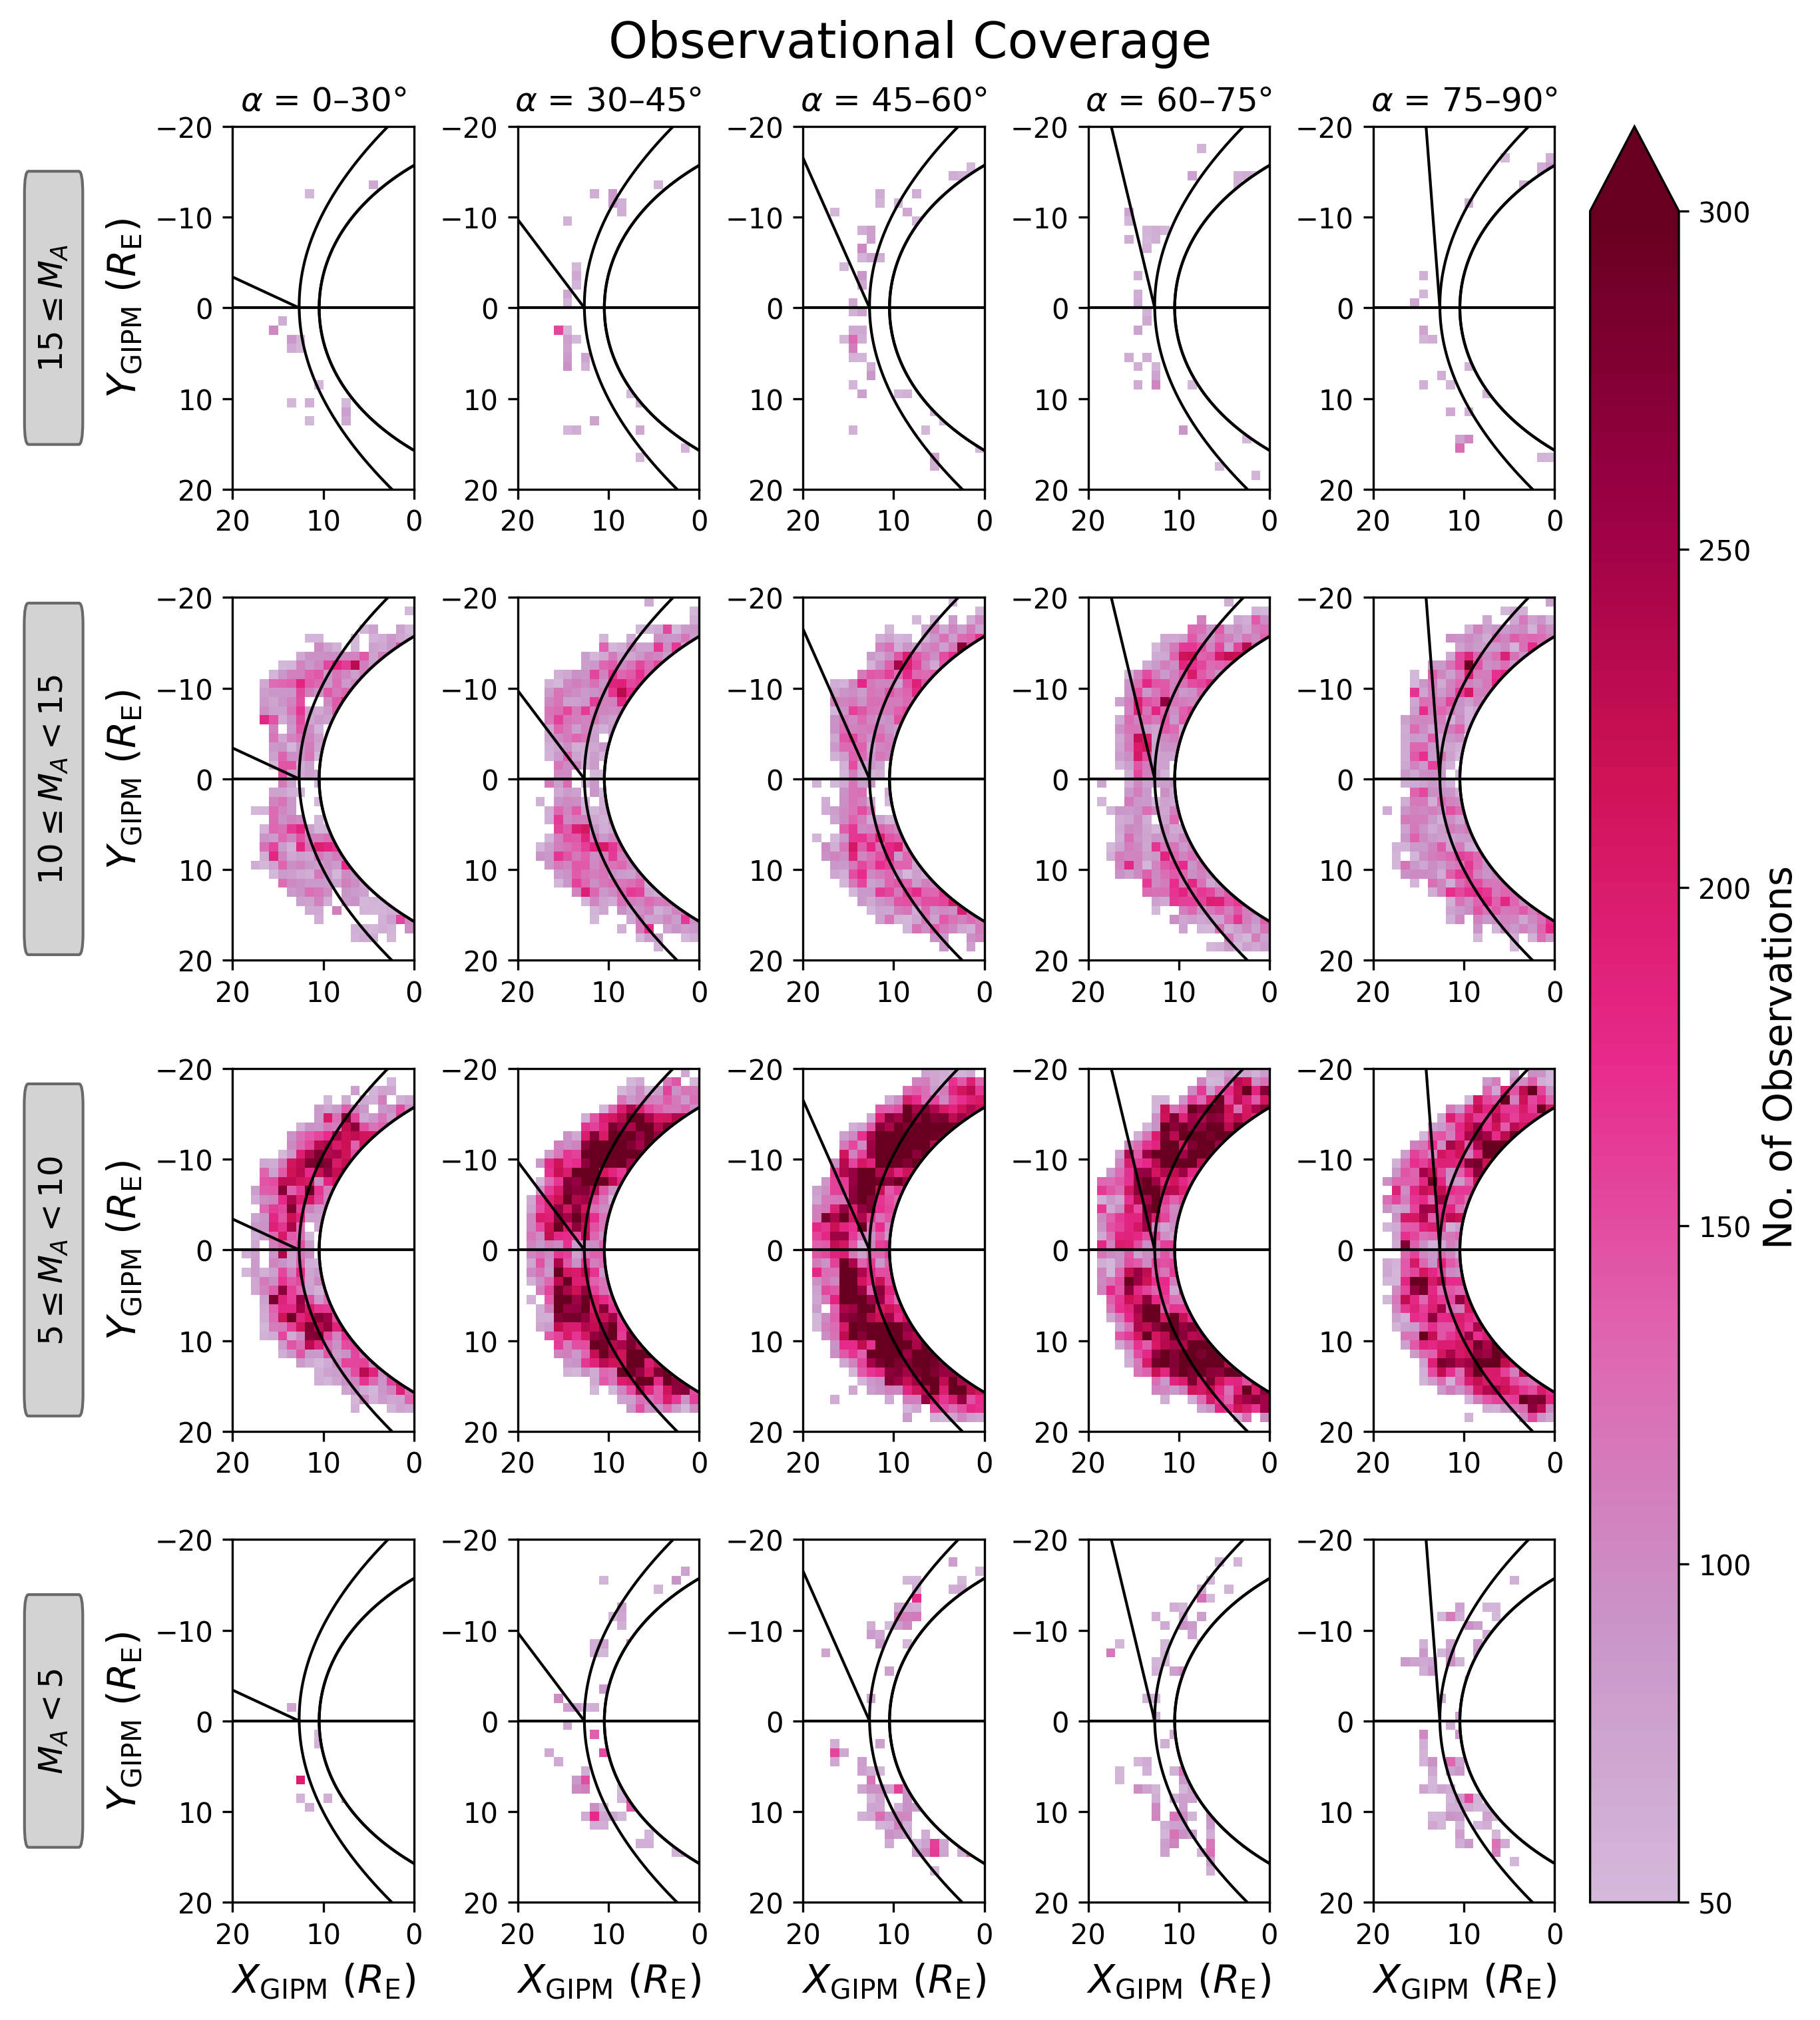

In [42]:


# -------------------------------
# CREATE FIGURE + GRID
# -------------------------------

fig = plt.figure(figsize=(9, 10), dpi=300, constrained_layout=True)
gs = fig.add_gridspec(
    nrows=4, ncols=6,      # 1 column for patch labels
    width_ratios=[0.35, 1, 1, 1, 1, 1],  # label column thinner
    wspace=0.05, hspace=0.1
)

fig.suptitle("Observational Coverage", fontsize=18)
plt.rcParams['axes.labelsize'] = 14

# Row labels (top row → bottom row)
row_labels = [
    r'$15 \leq M_A$',
    r'$10 \leq M_A < 15$',
    r'$5 \leq M_A < 10$',
    r'$M_A < 5$'
]

# -------------------------------
# MAKE AXES FOR THE 4×5 PANELS
# -------------------------------
axs = []
for r in range(4):
    plot_row_axes = []
    gs_row = r      
    for c in range(5):
        ax = fig.add_subplot(gs[gs_row, c + 1])
        plot_row_axes.append(ax)
    axs.append(plot_row_axes)

# -------------------------------
# Patch Labels (Rounded Boxes)
# -------------------------------

for r in range(4):
    ax_patch = fig.add_subplot(gs[r, 0])
    ax_patch.set_axis_off()

    # -- Draw text first so we can query its bounding box --
    txt = ax_patch.text(
        0.5, 0.5,                     # centered in the Axes
        row_labels[r],
        ha="center",
        va="center",
        fontsize=12,
        transform=ax_patch.transAxes,
        rotation='vertical'
    )

    fig.canvas.draw()  # required to obtain correct text bounding box

    # -- Convert text bounding box from display to Axes coordinates --
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    bbox_axes = TransformedBbox(
        bbox, ax_patch.transAxes.inverted()
    )

    # Add some padding around the text
    pad_x = 0.04   # fractional padding in axes coordinates
    pad_y = 0.01

    x0 = bbox_axes.x0 - pad_x
    y0 = bbox_axes.y0 - pad_y
    width = bbox_axes.width + 2 * pad_x
    height = bbox_axes.height + 2 * pad_y

    # -- Rounded box placed behind the text --
    box = FancyBboxPatch(
        (x0, y0),
        width,
        height,
        boxstyle="round,pad=0.2,rounding_size=0.06",
        fc="lightgrey",
        ec="dimgrey",
        linewidth=1,
        mutation_aspect=1,
        transform=ax_patch.transAxes,
        zorder=0.5,
    )
    ax_patch.add_patch(box)

    # Move text above box
    txt.set_zorder(1)


# -------------------------------
# COLORMAP
# -------------------------------

PuRd_lowcutoff = matplotlib.colormaps['PuRd']
newcmp = ListedColormap(PuRd_lowcutoff(np.linspace(0.25, 1, 192)))

newcmp.set_under('w')

# -------------------------------
# PLOT ALL PANELS
# -------------------------------

for col in range(5):                         # angle class
    title = angle_titles[col]
    slope = line_slopes[title]
    y_e = -x_e * slope

    for row in range(4):                     # mach no. class
        ax = axs[row][col]

        # Draw contour, magnetopause
        draw_background(ax, Xgipm[:, :, 0], Ygipm[:, :, 0], f[:, :, 0],
                        X_shue, R_shue)

        # Histogram for this cell
        hist = hist_blocks[row][col]

        # angle line parameters: (x_s, x_e, y_s, y_e)
        angle_line = (x_s, x_e, y_s, y_e)

        draw_hist(ax, hist, extent, newcmp, angle_line)
        mask_inside_magnetopause(ax, X_shue, R_shue)
        # redraw magnetopause boundary so it stays crisp
        ax.plot(X_shue, R_shue, 'k', linewidth=1)
        set_limits(ax)

        # Labels
        if col == 0:
            ax.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        if row == 3:
            ax.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        if row == 0:
            ax.set_title(rf'$\alpha$ = {title}', fontsize=12)

# -------------------------------
# COLORBAR
# -------------------------------

im = axs[0][0].images[0]
fig.colorbar(im, ax=[ax for row in axs for ax in row],
             location='right', pad=0.02,
             label='No. of Observations', extend='max')

plt.show()


In [43]:
#making ratios

transverse_ratio_heatmap = {
    'rad': transverse_heatmap["rad"]["10_15"]/transverse_heatmap["rad"]["5_10"],
    'lowspir': transverse_heatmap["lowspir"]["10_15"]/transverse_heatmap["lowspir"]["5_10"],
    'highspir': transverse_heatmap["highspir"]["10_15"]/transverse_heatmap["highspir"]["5_10"],
    'lowperp': transverse_heatmap["lowperp"]["10_15"]/transverse_heatmap["lowperp"]["5_10"],
    'highperp': transverse_heatmap["highperp"]["10_15"]/transverse_heatmap["highperp"]["5_10"]
}


#now make new blocks just for 10-15 & 5-10, and ratios

trans_blocks = [
    [transverse_heatmap["rad"]["10_15"], transverse_heatmap["lowspir"]["10_15"], transverse_heatmap["highspir"]["10_15"], transverse_heatmap["lowperp"]["10_15"], transverse_heatmap["highperp"]["10_15"]],
    [transverse_heatmap["rad"]["5_10"], transverse_heatmap["lowspir"]["5_10"], transverse_heatmap["highspir"]["5_10"], transverse_heatmap["lowperp"]["5_10"], transverse_heatmap["highperp"]["5_10"]],
    [transverse_ratio_heatmap["rad"], transverse_ratio_heatmap["lowspir"], transverse_ratio_heatmap["highspir"], transverse_ratio_heatmap["lowperp"], transverse_ratio_heatmap["highperp"]]
]


###Compressive wave power!
compressive_ratio_heatmap = {
    'rad': compressive_heatmap["rad"]["10_15"]/compressive_heatmap["rad"]["5_10"],
    'lowspir': compressive_heatmap["lowspir"]["10_15"]/compressive_heatmap["lowspir"]["5_10"],
    'highspir': compressive_heatmap["highspir"]["10_15"]/compressive_heatmap["highspir"]["5_10"],
    'lowperp': compressive_heatmap["lowperp"]["10_15"]/compressive_heatmap["lowperp"]["5_10"],
    'highperp': compressive_heatmap["highperp"]["10_15"]/compressive_heatmap["highperp"]["5_10"]
}

#now make new blocks just for 10-15 & 5-10, and ratios

comp_blocks = [
    [compressive_heatmap["rad"]["10_15"], compressive_heatmap["lowspir"]["10_15"], compressive_heatmap["highspir"]["10_15"], compressive_heatmap["lowperp"]["10_15"], compressive_heatmap["highperp"]["10_15"]],
    [compressive_heatmap["rad"]["5_10"], compressive_heatmap["lowspir"]["5_10"], compressive_heatmap["highspir"]["5_10"], compressive_heatmap["lowperp"]["5_10"], compressive_heatmap["highperp"]["5_10"]],
    [compressive_ratio_heatmap["rad"], compressive_ratio_heatmap["lowspir"], compressive_ratio_heatmap["highspir"], compressive_ratio_heatmap["lowperp"], compressive_ratio_heatmap["highperp"]]
]

#Compressibility!

#making ratios

compressibility_ratio_heatmap = {
    'rad': compressibility_heatmap["rad"]["10_15"]/compressibility_heatmap["rad"]["5_10"],
    'lowspir': compressibility_heatmap["lowspir"]["10_15"]/compressibility_heatmap["lowspir"]["5_10"],
    'highspir': compressibility_heatmap["highspir"]["10_15"]/compressibility_heatmap["highspir"]["5_10"],
    'lowperp': compressibility_heatmap["lowperp"]["10_15"]/compressibility_heatmap["lowperp"]["5_10"],
    'highperp': compressibility_heatmap["highperp"]["10_15"]/compressibility_heatmap["highperp"]["5_10"]
}


#now make new blocks just for 10-15 & 5-10, and ratios

compressibility_blocks = [
    [compressibility_heatmap["rad"]["10_15"], compressibility_heatmap["lowspir"]["10_15"], compressibility_heatmap["highspir"]["10_15"], compressibility_heatmap["lowperp"]["10_15"], compressibility_heatmap["highperp"]["10_15"]],
    [compressibility_heatmap["rad"]["5_10"], compressibility_heatmap["lowspir"]["5_10"], compressibility_heatmap["highspir"]["5_10"], compressibility_heatmap["lowperp"]["5_10"], compressibility_heatmap["highperp"]["5_10"]],
    [compressibility_ratio_heatmap["rad"], compressibility_ratio_heatmap["lowspir"], compressibility_ratio_heatmap["highspir"], compressibility_ratio_heatmap["lowperp"], compressibility_ratio_heatmap["highperp"]]
]

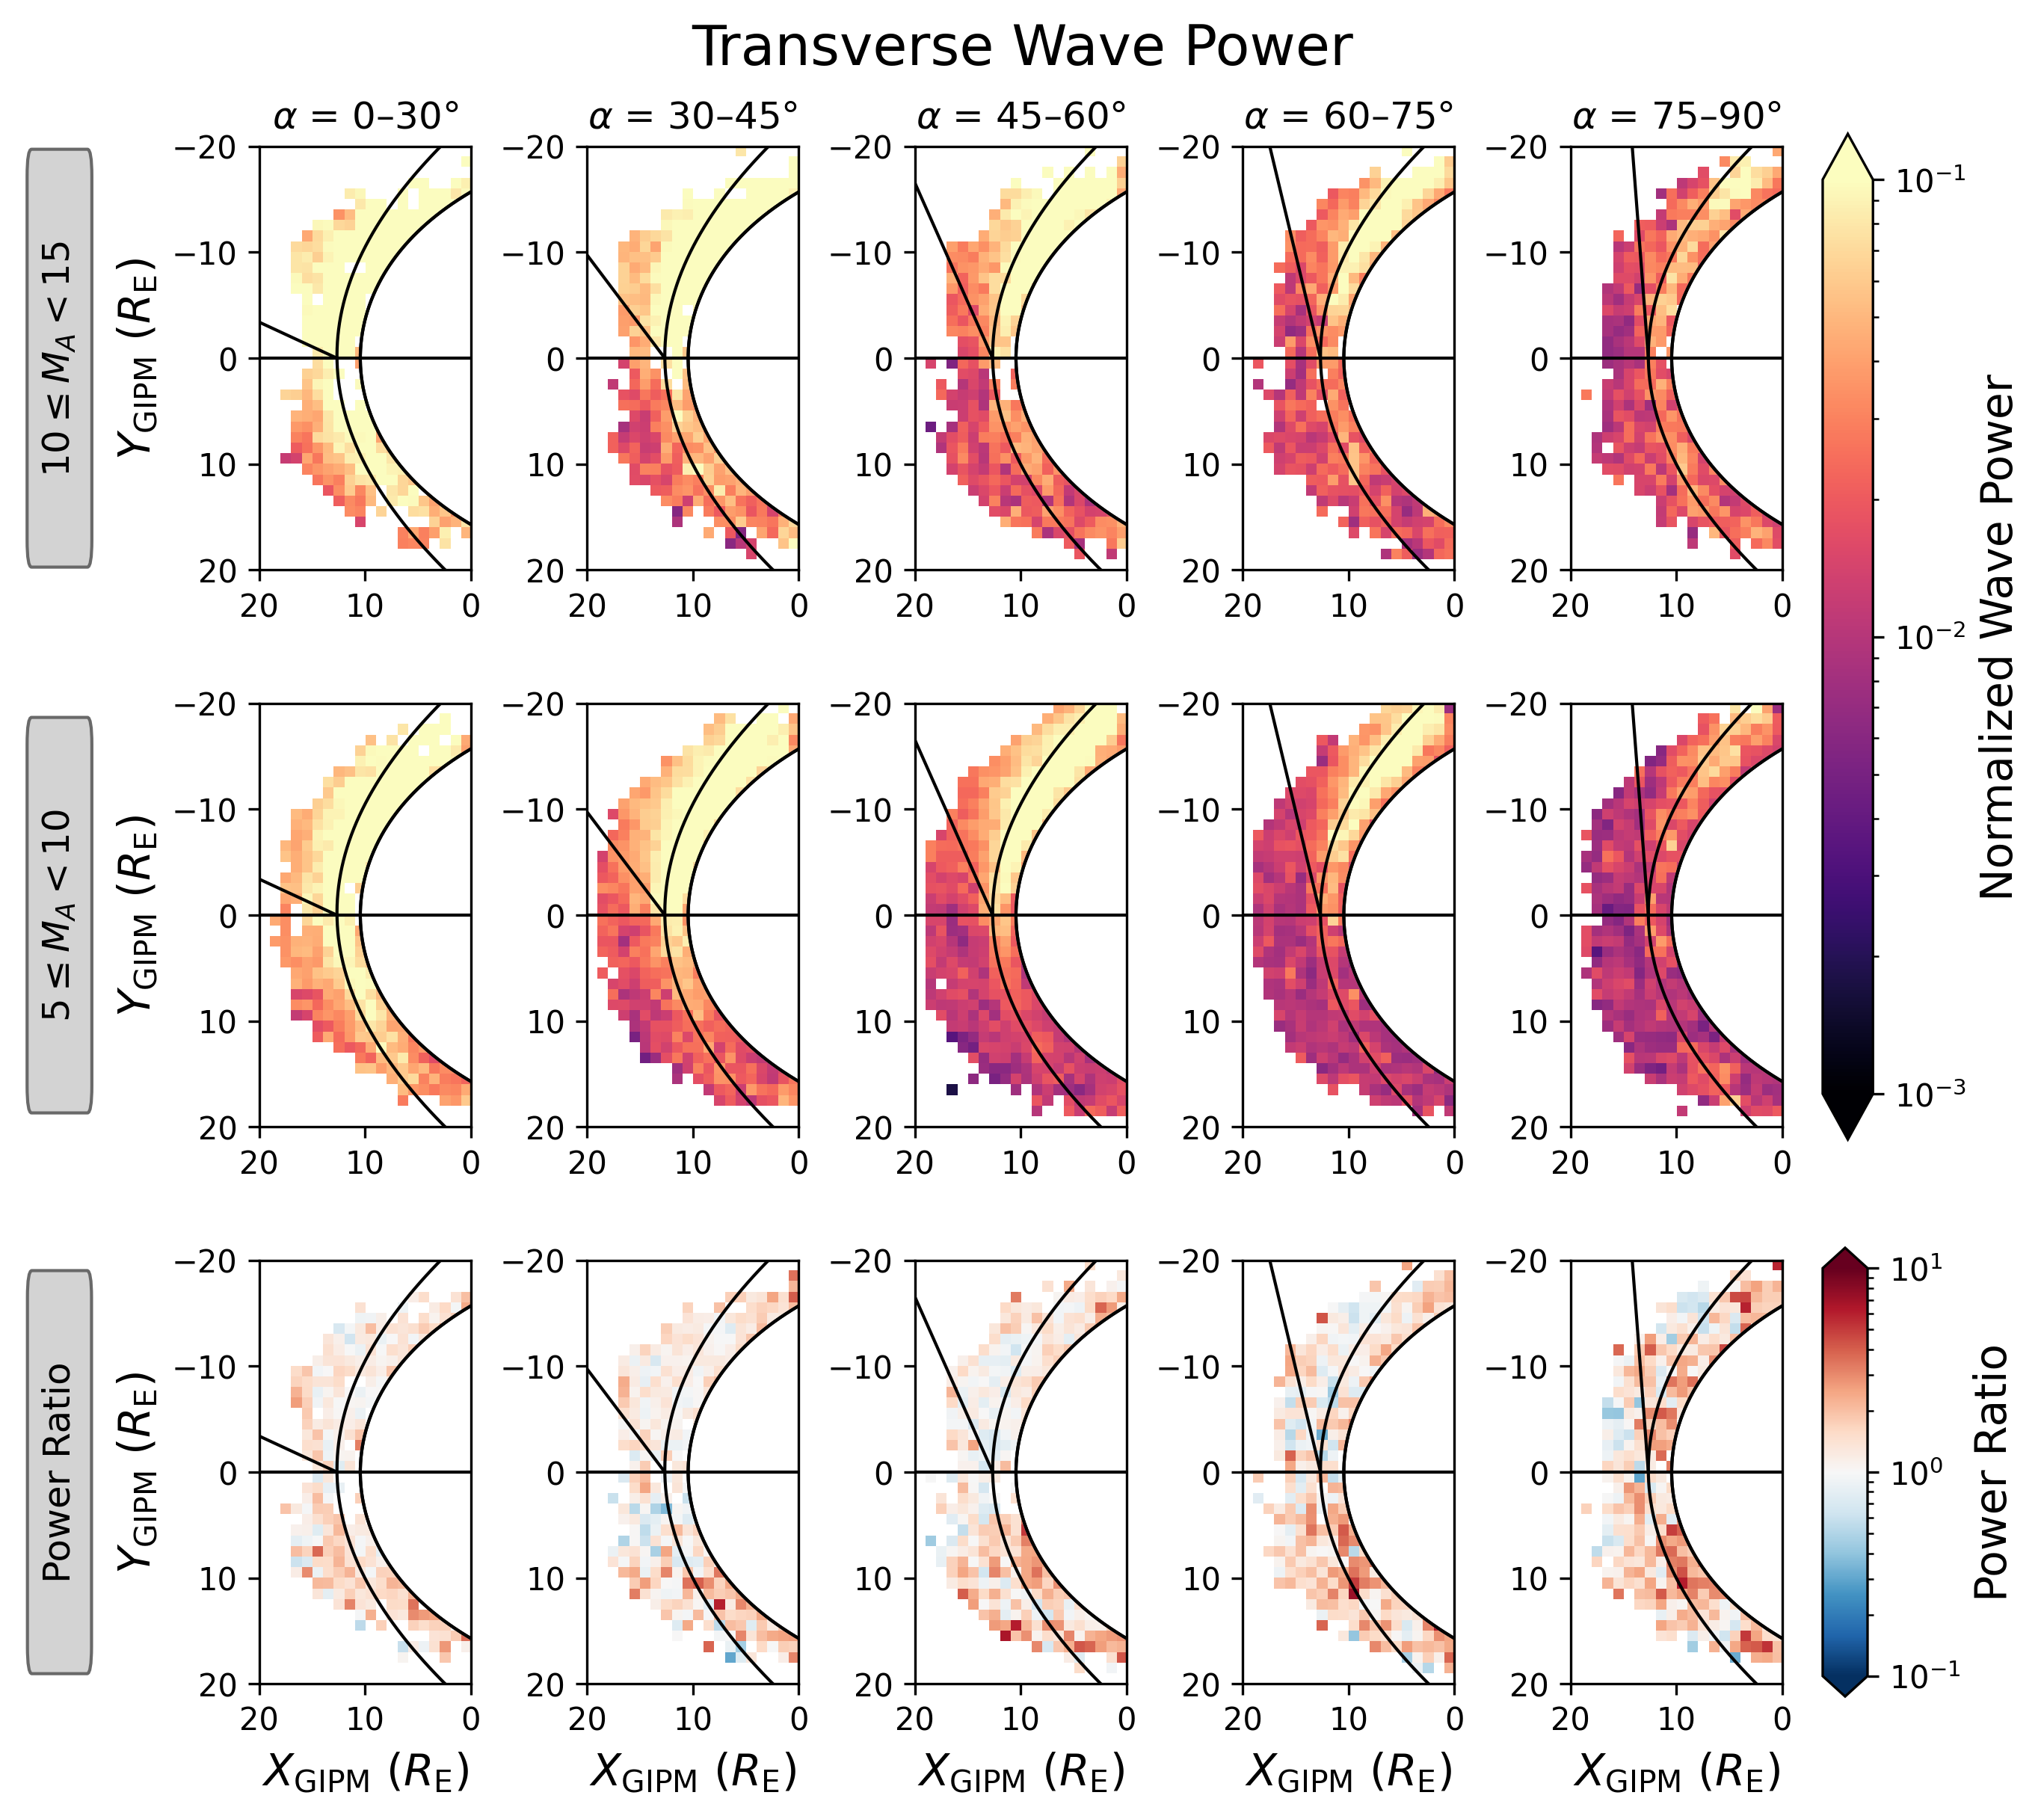

In [44]:
#now make same plot, but with just three rows!

#new heatmap function 

def draw_heatmap(ax, hist, extent, cmap, cmap_norm, angle_line):
    """Draw heatmap + flow line"""
    ax.imshow(hist, interpolation='none', origin='lower',
              extent=extent, cmap=cmap, norm=cmap_norm)
    
    x_s, x_e, y_s, y_e = angle_line
    ax.plot([x_s, x_e], [y_s, angle_line[3]], color='k', linewidth=1)

# -------------------------------
# CREATE FIGURE + GRID
# -------------------------------

fig = plt.figure(figsize=(9, 8), dpi=300, constrained_layout=True)
gs = fig.add_gridspec(
    nrows=3, ncols=6,      # 1 column for patch labels
    width_ratios=[0.35, 1, 1, 1, 1, 1],  # label column thinner
    wspace=0.05, hspace=0.1
)

fig.suptitle("Transverse Wave Power", fontsize=18)
plt.rcParams['axes.labelsize'] = 14

# Row labels (top row → bottom row)
row_labels = [
    r'$10 \leq M_A < 15$',
    r'$5 \leq M_A < 10$',
    r'Power Ratio'
]

# -------------------------------
# MAKE AXES FOR THE 3×5 PANELS
# -------------------------------
axs = []
for r in range(3):
    plot_row_axes = []
    gs_row = r      
    for c in range(5):
        ax = fig.add_subplot(gs[gs_row, c + 1])
        plot_row_axes.append(ax)
    axs.append(plot_row_axes)

# -------------------------------
# Patch Labels (Rounded Boxes)
# -------------------------------

for r in range(3):
    ax_patch = fig.add_subplot(gs[r, 0])
    ax_patch.set_axis_off()

    # -- Draw text first so we can query its bounding box --
    txt = ax_patch.text(
        0.5, 0.5,                     # centered in the Axes
        row_labels[r],
        ha="center",
        va="center",
        fontsize=12,
        transform=ax_patch.transAxes,
        rotation='vertical'
    )

    fig.canvas.draw()  # required to obtain correct text bounding box

    # -- Convert text bounding box from display to Axes coordinates --
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    bbox_axes = TransformedBbox(
        bbox, ax_patch.transAxes.inverted()
    )

    # Add some padding around the text
    pad_x = 0.04   # fractional padding in axes coordinates
    pad_y = 0.01

    x0 = bbox_axes.x0 - pad_x
    y0 = bbox_axes.y0 - pad_y
    width = bbox_axes.width + 2 * pad_x
    height = bbox_axes.height + 2 * pad_y

    # -- Rounded box placed behind the text --
    box = FancyBboxPatch(
        (x0, y0),
        width,
        height,
        boxstyle="round,pad=0.2,rounding_size=0.06",
        fc="lightgrey",
        ec="dimgrey",
        linewidth=1,
        mutation_aspect=1,
        transform=ax_patch.transAxes,
        zorder=0.5,
    )
    ax_patch.add_patch(box)

    # Move text above box
    txt.set_zorder(1)


# -------------------------------
# COLORMAP
# -------------------------------

powercmp = 'magma'
power_norm = colors.LogNorm(vmin=0.001, vmax=0.1)
ratio_cmp = 'RdBu_r'
ratio_norm = colors.LogNorm(vmin=0.1, vmax=10)

# -------------------------------
# PLOT ALL PANELS
# -------------------------------

for col in range(5):                         # angle class
    title = angle_titles[col]
    slope = line_slopes[title]
    y_e = -x_e * slope

    for row in range(3):                     # mach no. class
        ax = axs[row][col]

        # Draw contour, magnetopause
        draw_background(ax, Xgipm[:, :, 0], Ygipm[:, :, 0], f[:, :, 0],
                        X_shue, R_shue)

        # Histogram for this cell
        hist = trans_blocks[row][col]

        # angle line parameters: (x_s, x_e, y_s, y_e)
        angle_line = (x_s, x_e, y_s, y_e)

        if row < 2:
            draw_heatmap(ax, hist, extent, powercmp, power_norm, angle_line)

        if row == 2:
            draw_heatmap(ax, hist, extent, ratio_cmp, ratio_norm, angle_line)
            
        mask_inside_magnetopause(ax, X_shue, R_shue)
        
        # redraw magnetopause boundary so it stays crisp
        ax.plot(X_shue, R_shue, 'k', linewidth=1)
        set_limits(ax)

        # Labels
        if col == 0:
            ax.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        if row == 0:
            ax.set_title(rf'$\alpha$ = {title}', fontsize=12)
        if row == 2:
            ax.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

# -------------------------------
# COLORBARS (TWO SEPARATE ON RIGHT)
# -------------------------------

from matplotlib.cm import ScalarMappable

# --- Scalar mappables (independent of any single subplot image)
sm_power = ScalarMappable(norm=power_norm, cmap=powercmp)
sm_power.set_array([])

sm_ratio = ScalarMappable(norm=ratio_norm, cmap=ratio_cmp)
sm_ratio.set_array([])

# --- Top two rows colourbar (wave power)
top_axes = axs[0] + axs[1]   # flatten row 0 and 1
cbar1 = fig.colorbar(
    sm_power,
    ax=top_axes,
    location='right',
    pad=0.02,
    extend='both'
)
cbar1.set_label('Normalized Wave Power')

# --- Bottom row colourbar (ratio)
bottom_axes = axs[2]
cbar2 = fig.colorbar(
    sm_ratio,
    ax=bottom_axes,
    location='right',
    aspect=10,
    pad=0.02,
    extend='both'
)
cbar2.set_label('Power Ratio')

cbar1.ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext())
cbar2.ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext())


plt.show()


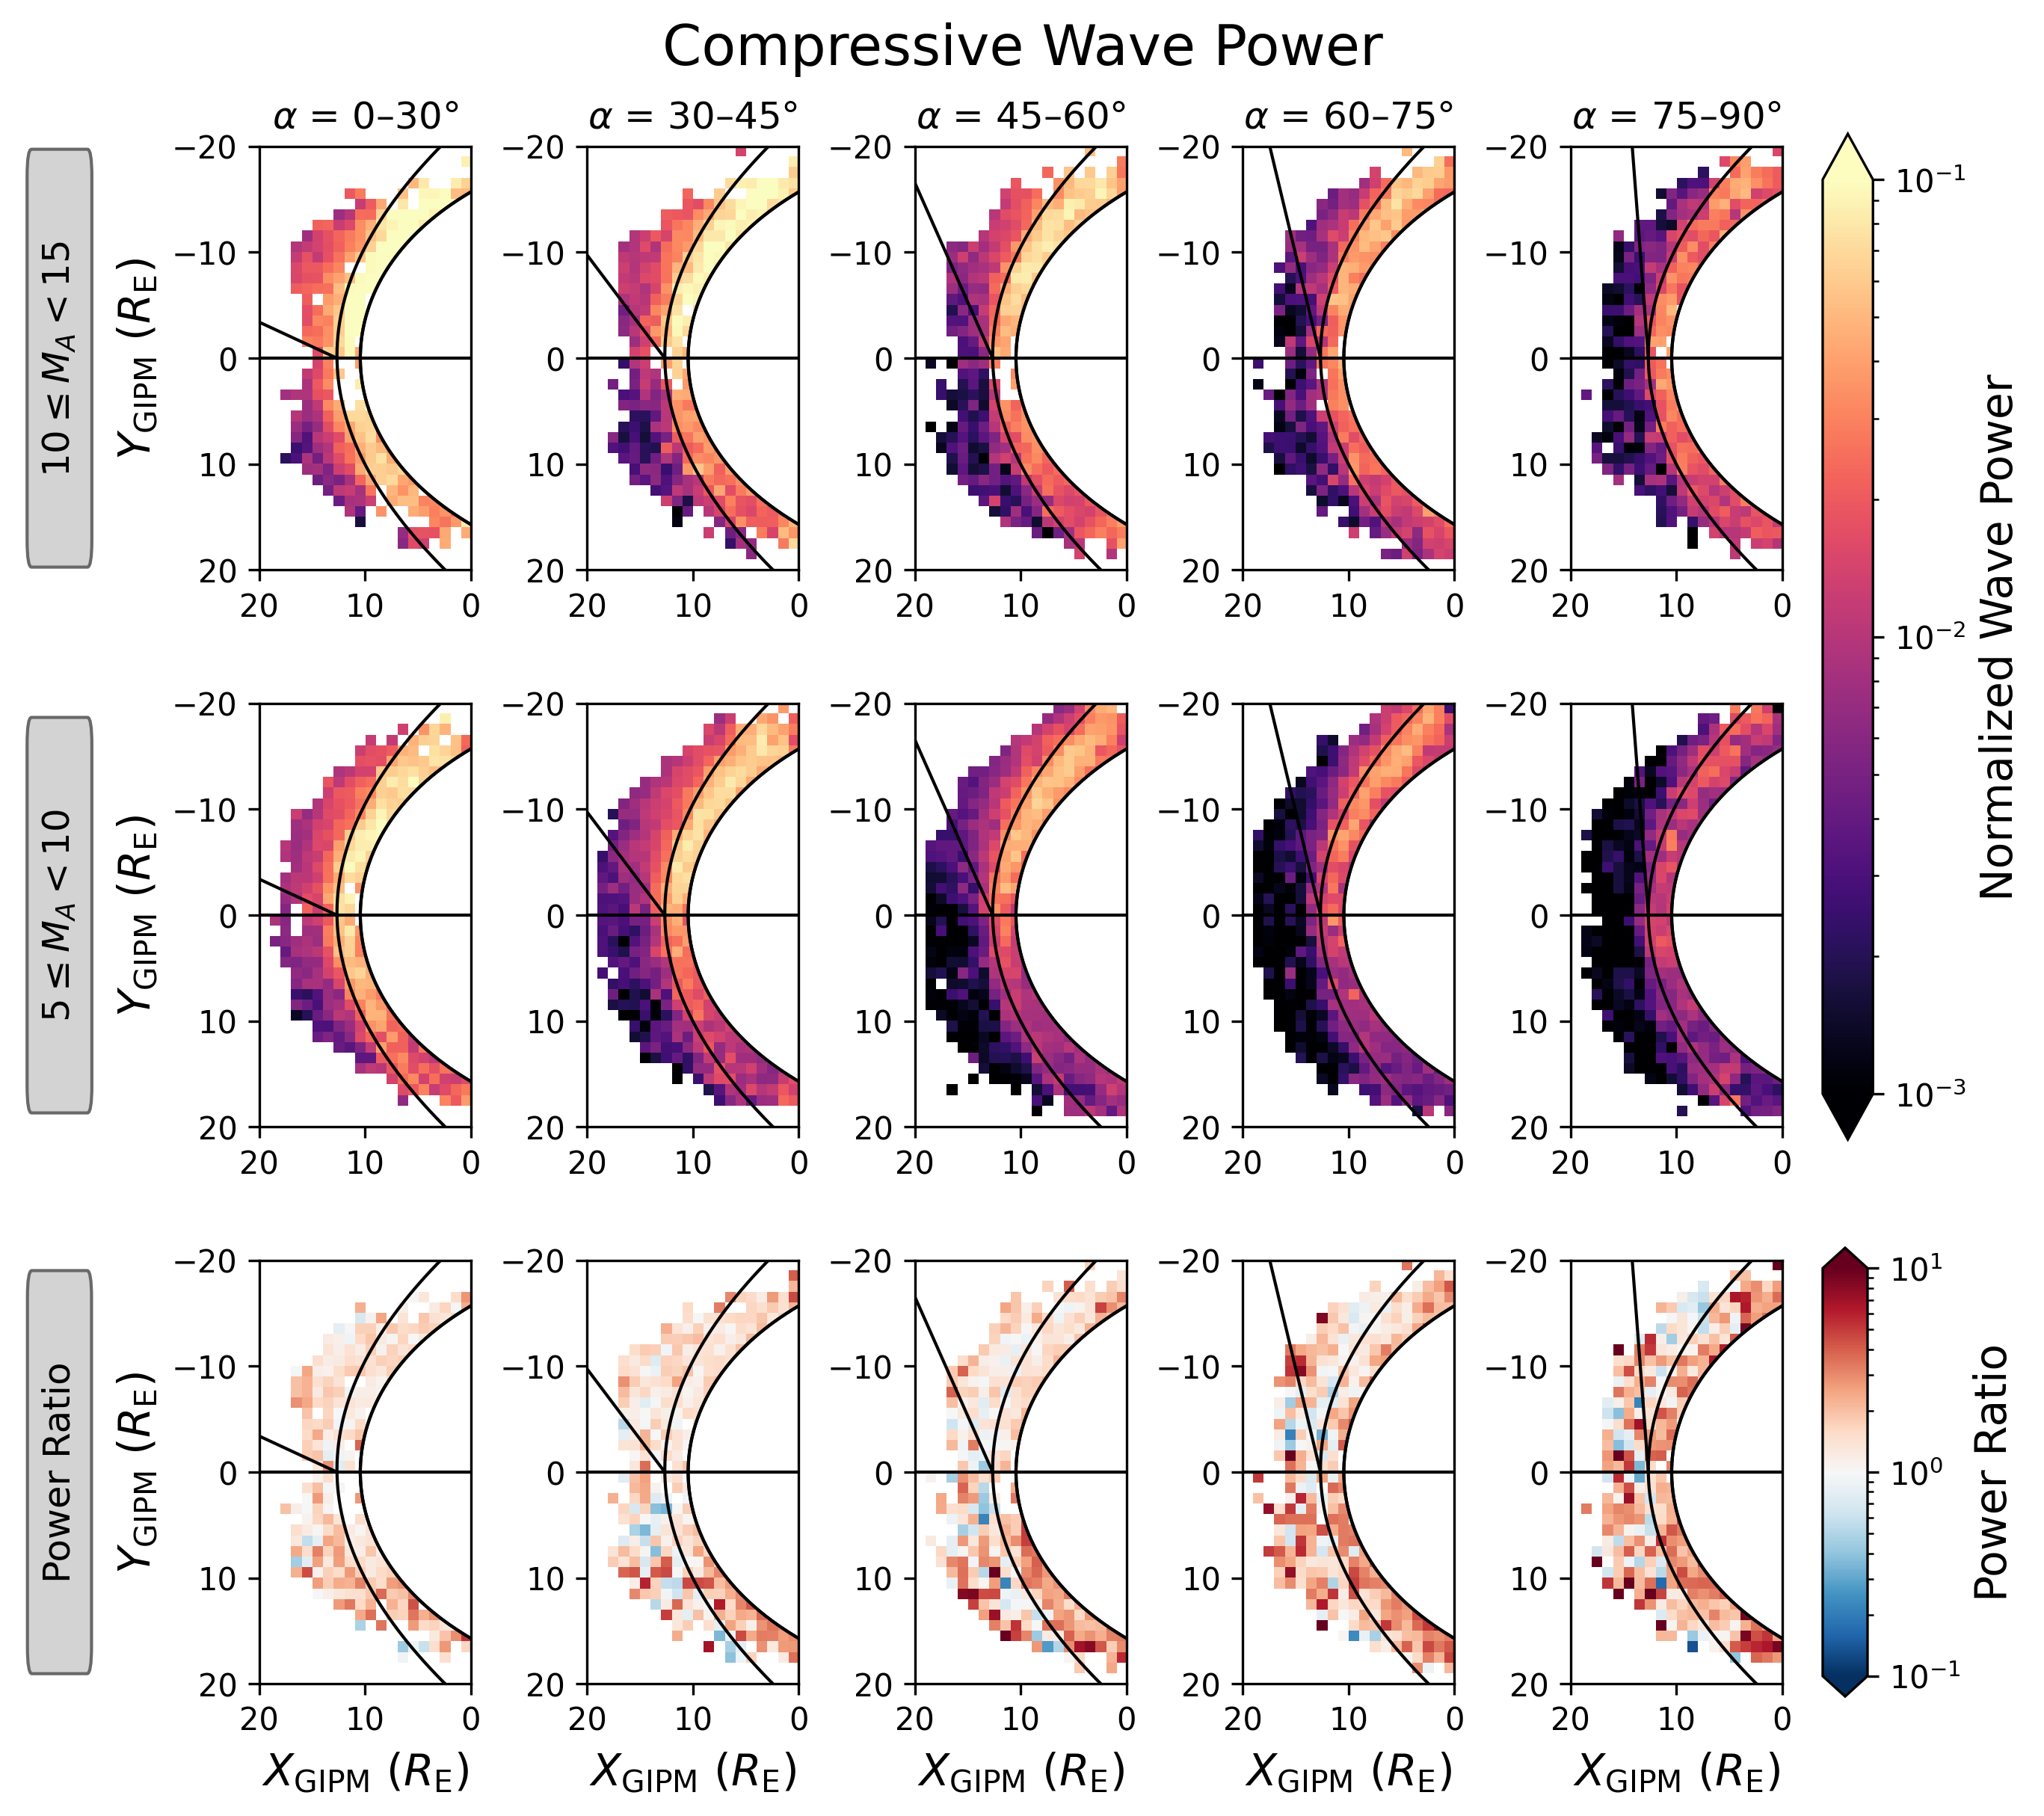

In [45]:
#Compressive power comparison

# -------------------------------
# CREATE FIGURE + GRID
# -------------------------------

fig = plt.figure(figsize=(9, 8), dpi=300, constrained_layout=True)
gs = fig.add_gridspec(
    nrows=3, ncols=6,      # 1 column for patch labels
    width_ratios=[0.35, 1, 1, 1, 1, 1],  # label column thinner
    wspace=0.05, hspace=0.1
)

fig.suptitle("Compressive Wave Power", fontsize=18)
plt.rcParams['axes.labelsize'] = 14

# Row labels (top row → bottom row)
row_labels = [
    r'$10 \leq M_A < 15$',
    r'$5 \leq M_A < 10$',
    r'Power Ratio'
]

# -------------------------------
# MAKE AXES FOR THE 3×5 PANELS
# -------------------------------
axs = []
for r in range(3):
    plot_row_axes = []
    gs_row = r      
    for c in range(5):
        ax = fig.add_subplot(gs[gs_row, c + 1])
        plot_row_axes.append(ax)
    axs.append(plot_row_axes)

# -------------------------------
# Patch Labels (Rounded Boxes)
# -------------------------------

for r in range(3):
    ax_patch = fig.add_subplot(gs[r, 0])
    ax_patch.set_axis_off()

    # -- Draw text first so we can query its bounding box --
    txt = ax_patch.text(
        0.5, 0.5,                     # centered in the Axes
        row_labels[r],
        ha="center",
        va="center",
        fontsize=12,
        transform=ax_patch.transAxes,
        rotation='vertical'
    )

    fig.canvas.draw()  # required to obtain correct text bounding box

    # -- Convert text bounding box from display to Axes coordinates --
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    bbox_axes = TransformedBbox(
        bbox, ax_patch.transAxes.inverted()
    )

    # Add some padding around the text
    pad_x = 0.04   # fractional padding in axes coordinates
    pad_y = 0.01

    x0 = bbox_axes.x0 - pad_x
    y0 = bbox_axes.y0 - pad_y
    width = bbox_axes.width + 2 * pad_x
    height = bbox_axes.height + 2 * pad_y

    # -- Rounded box placed behind the text --
    box = FancyBboxPatch(
        (x0, y0),
        width,
        height,
        boxstyle="round,pad=0.2,rounding_size=0.06",
        fc="lightgrey",
        ec="dimgrey",
        linewidth=1,
        mutation_aspect=1,
        transform=ax_patch.transAxes,
        zorder=0.5,
    )
    ax_patch.add_patch(box)

    # Move text above box
    txt.set_zorder(1)


# -------------------------------
# COLORMAP
# -------------------------------

powercmp = 'magma'
power_norm = colors.LogNorm(vmin=0.001, vmax=0.1)
ratio_cmp = 'RdBu_r'
ratio_norm = colors.LogNorm(vmin=0.1, vmax=10)

# -------------------------------
# PLOT ALL PANELS
# -------------------------------

for col in range(5):                         # angle class
    title = angle_titles[col]
    slope = line_slopes[title]
    y_e = -x_e * slope

    for row in range(3):                     # mach no. class
        ax = axs[row][col]

        # Draw contour, magnetopause
        draw_background(ax, Xgipm[:, :, 0], Ygipm[:, :, 0], f[:, :, 0],
                        X_shue, R_shue)

        # Histogram for this cell
        hist = comp_blocks[row][col]

        # angle line parameters: (x_s, x_e, y_s, y_e)
        angle_line = (x_s, x_e, y_s, y_e)

        if row < 2:
            draw_heatmap(ax, hist, extent, powercmp, power_norm, angle_line)

        if row == 2:
            draw_heatmap(ax, hist, extent, ratio_cmp, ratio_norm, angle_line)
            
        mask_inside_magnetopause(ax, X_shue, R_shue)
        
        # redraw magnetopause boundary so it stays crisp
        ax.plot(X_shue, R_shue, 'k', linewidth=1)
        set_limits(ax)

        # Labels
        if col == 0:
            ax.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        if row == 0:
            ax.set_title(rf'$\alpha$ = {title}', fontsize=12)
        if row == 2:
            ax.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

# -------------------------------
# COLORBARS (TWO SEPARATE ON RIGHT)
# -------------------------------

from matplotlib.cm import ScalarMappable

# --- Scalar mappables (independent of any single subplot image)
sm_power = ScalarMappable(norm=power_norm, cmap=powercmp)
sm_power.set_array([])

sm_ratio = ScalarMappable(norm=ratio_norm, cmap=ratio_cmp)
sm_ratio.set_array([])

# --- Top two rows colourbar (wave power)
top_axes = axs[0] + axs[1]   # flatten row 0 and 1
cbar1 = fig.colorbar(
    sm_power,
    ax=top_axes,
    location='right',
    pad=0.02,
    extend='both'
)
cbar1.set_label('Normalized Wave Power')

# --- Bottom row colourbar (ratio)
bottom_axes = axs[2]
cbar2 = fig.colorbar(
    sm_ratio,
    ax=bottom_axes,
    location='right',
    aspect=10,
    pad=0.02,
    extend='both'
)
cbar2.set_label('Power Ratio')

cbar1.ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext())
cbar2.ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext())


plt.show()


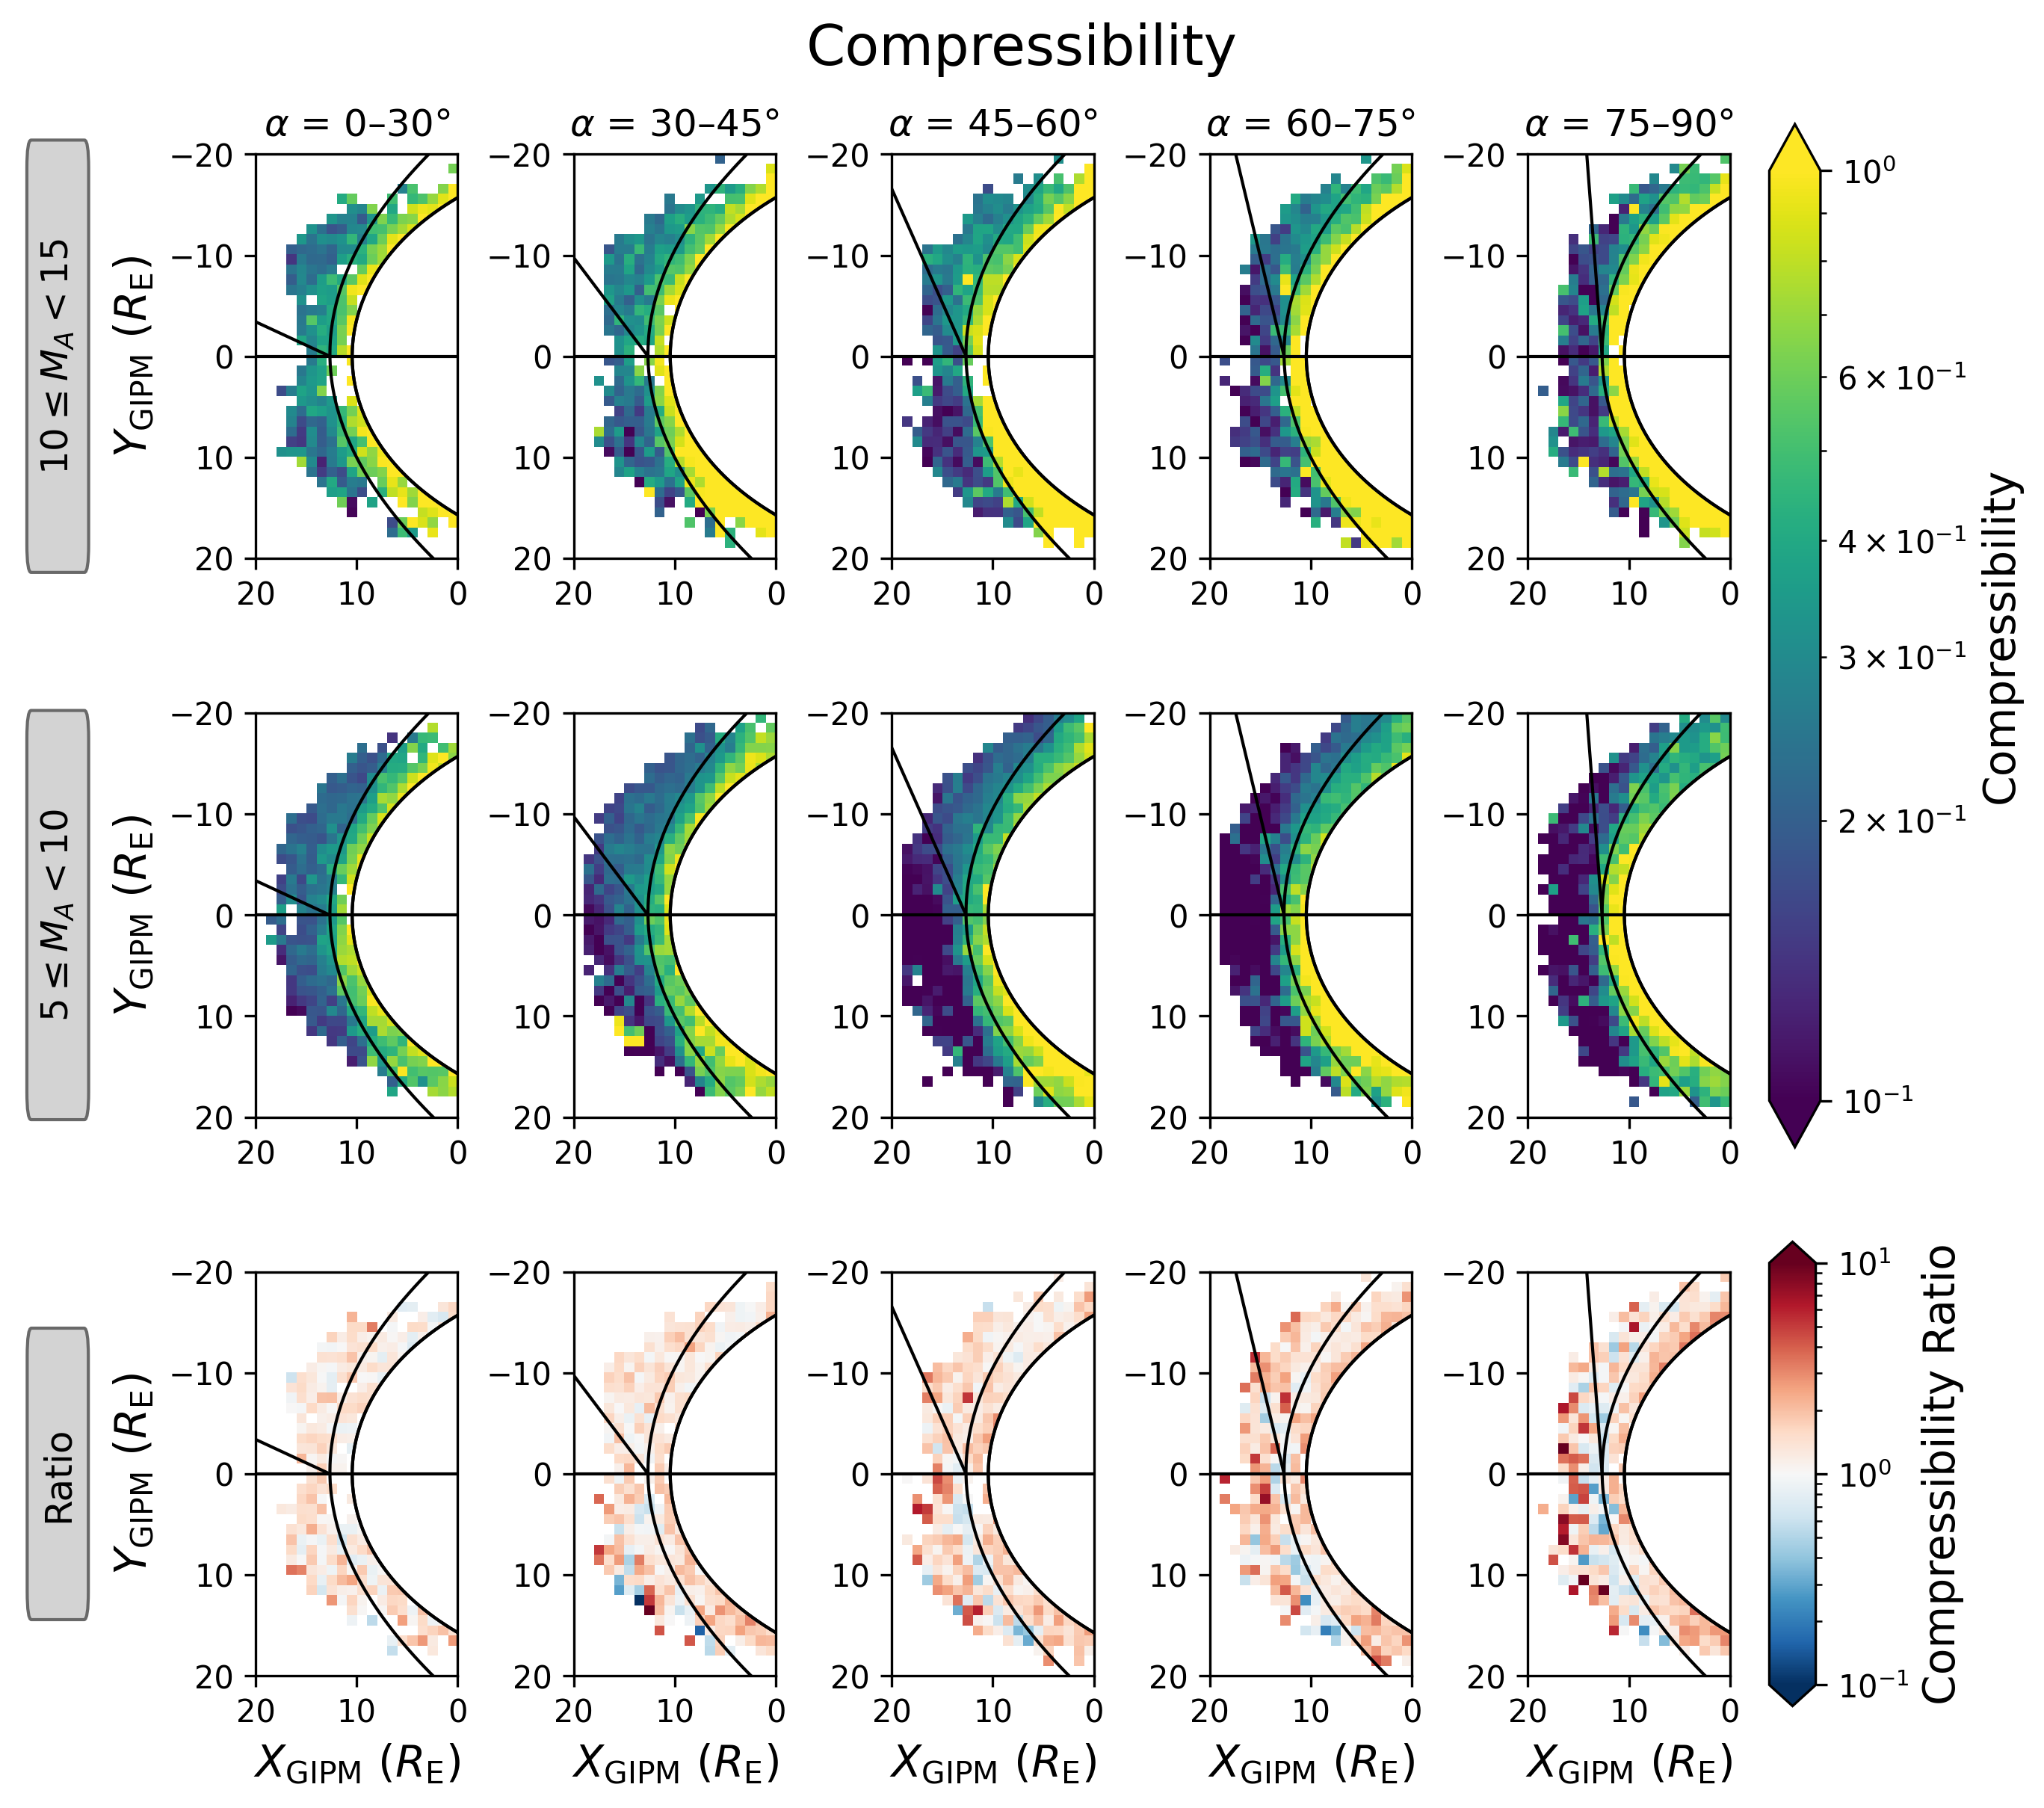

In [46]:
#Compressibility power comparison

# -------------------------------
# CREATE FIGURE + GRID
# -------------------------------

fig = plt.figure(figsize=(9, 8), dpi=300, constrained_layout=True)
gs = fig.add_gridspec(
    nrows=3, ncols=6,      # 1 column for patch labels
    width_ratios=[0.35, 1, 1, 1, 1, 1],  # label column thinner
    wspace=0.05, hspace=0.1
)

fig.suptitle("Compressibility", fontsize=18)
plt.rcParams['axes.labelsize'] = 14

# Row labels (top row → bottom row)
row_labels = [
    r'$10 \leq M_A < 15$',
    r'$5 \leq M_A < 10$',
    r'Ratio'
]

# -------------------------------
# MAKE AXES FOR THE 3×5 PANELS
# -------------------------------
axs = []
for r in range(3):
    plot_row_axes = []
    gs_row = r      
    for c in range(5):
        ax = fig.add_subplot(gs[gs_row, c + 1])
        plot_row_axes.append(ax)
    axs.append(plot_row_axes)

# -------------------------------
# Patch Labels (Rounded Boxes)
# -------------------------------

for r in range(3):
    ax_patch = fig.add_subplot(gs[r, 0])
    ax_patch.set_axis_off()

    # -- Draw text first so we can query its bounding box --
    txt = ax_patch.text(
        0.5, 0.5,                     # centered in the Axes
        row_labels[r],
        ha="center",
        va="center",
        fontsize=12,
        transform=ax_patch.transAxes,
        rotation='vertical'
    )

    fig.canvas.draw()  # required to obtain correct text bounding box

    # -- Convert text bounding box from display to Axes coordinates --
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    bbox_axes = TransformedBbox(
        bbox, ax_patch.transAxes.inverted()
    )

    # Add some padding around the text
    pad_x = 0.04   # fractional padding in axes coordinates
    pad_y = 0.01

    x0 = bbox_axes.x0 - pad_x
    y0 = bbox_axes.y0 - pad_y
    width = bbox_axes.width + 2 * pad_x
    height = bbox_axes.height + 2 * pad_y

    # -- Rounded box placed behind the text --
    box = FancyBboxPatch(
        (x0, y0),
        width,
        height,
        boxstyle="round,pad=0.2,rounding_size=0.06",
        fc="lightgrey",
        ec="dimgrey",
        linewidth=1,
        mutation_aspect=1,
        transform=ax_patch.transAxes,
        zorder=0.5,
    )
    ax_patch.add_patch(box)

    # Move text above box
    txt.set_zorder(1)


# -------------------------------
# COLORMAP
# -------------------------------

powercmp = 'viridis'
power_norm = colors.LogNorm(vmin=0.1, vmax=1)
ratio_cmp = 'RdBu_r'
ratio_norm = colors.LogNorm(vmin=0.1, vmax=10)

# -------------------------------
# PLOT ALL PANELS
# -------------------------------

for col in range(5):                         # angle class
    title = angle_titles[col]
    slope = line_slopes[title]
    y_e = -x_e * slope

    for row in range(3):                     # mach no. class
        ax = axs[row][col]

        # Draw contour, magnetopause
        draw_background(ax, Xgipm[:, :, 0], Ygipm[:, :, 0], f[:, :, 0],
                        X_shue, R_shue)

        # Histogram for this cell
        hist = compressibility_blocks[row][col]

        # angle line parameters: (x_s, x_e, y_s, y_e)
        angle_line = (x_s, x_e, y_s, y_e)

        if row < 2:
            draw_heatmap(ax, hist, extent, powercmp, power_norm, angle_line)

        if row == 2:
            draw_heatmap(ax, hist, extent, ratio_cmp, ratio_norm, angle_line)
            
        mask_inside_magnetopause(ax, X_shue, R_shue)
        
        # redraw magnetopause boundary so it stays crisp
        ax.plot(X_shue, R_shue, 'k', linewidth=1)
        set_limits(ax)

        # Labels
        if col == 0:
            ax.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        if row == 0:
            ax.set_title(rf'$\alpha$ = {title}', fontsize=12)
        if row == 2:
            ax.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

# -------------------------------
# COLORBARS (TWO SEPARATE ON RIGHT)
# -------------------------------

from matplotlib.cm import ScalarMappable

# --- Scalar mappables (independent of any single subplot image)
sm_power = ScalarMappable(norm=power_norm, cmap=powercmp)
sm_power.set_array([])

sm_ratio = ScalarMappable(norm=ratio_norm, cmap=ratio_cmp)
sm_ratio.set_array([])

# --- Top two rows colourbar (wave power)
top_axes = axs[0] + axs[1]   # flatten row 0 and 1
cbar1 = fig.colorbar(
    sm_power,
    ax=top_axes,
    location='right',
    pad=0.02,
    extend='both'
)
cbar1.set_label('Compressibility')

# --- Bottom row colourbar (ratio)
bottom_axes = axs[2]
cbar2 = fig.colorbar(
    sm_ratio,
    ax=bottom_axes,
    location='right',
    aspect=10,
    pad=0.02,
    extend='both'
)
cbar2.set_label('Compressibility Ratio')

cbar1.ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext())
cbar2.ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext())


plt.show()


In [47]:
#now produce foreshock maps across larger bins: 30-52.5 and 52.5-75
#coverage histograms

df_30_52 = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 30) & (cl_filtered_lowZ['cone angle (mean)'] < 52.5)]
df_52_75 = cl_filtered_lowZ.loc[(cl_filtered_lowZ['cone angle (mean)'] > 52.5) & (cl_filtered_lowZ['cone angle (mean)'] < 75)]

#create compressibility column for each dataframe
df_list = [df_30_52 , df_52_75]

for df in df_list:
    df.loc[:, 'Compressibility'] = (
        df['ULF Band Normalised Compressive Power'] /
        df['ULF Band Normalised Transverse Power']
    )
    
#df_30_52 

df_30_52_5_10 = df_30_52.loc[((df_30_52['M_A (mean)'] >= 5) & (df_30_52['M_A (mean)'] < 10))]
df_30_52_10_15 = df_30_52.loc[((df_30_52['M_A (mean)'] >= 10) & (df_30_52['M_A (mean)'] < 15))]

#52_75 

df_52_75_5_10 = df_52_75.loc[((df_52_75['M_A (mean)'] >= 5) & (df_52_75['M_A (mean)'] < 10))]
df_52_75_10_15 = df_52_75.loc[((df_52_75['M_A (mean)'] >= 10) & (df_52_75['M_A (mean)'] < 15))]

x_bin_edges = range(20)
y_bin_edges = range(-20, 20)

_, xedg, yedg = np.histogram2d(
        df_radial['GIPM X (OMNI mean)'].to_numpy(),
        df_radial['GIPM Y (OMNI mean)'].to_numpy(),
        bins=[x_bin_edges, y_bin_edges]
    )

#updated to include heatmaps, with bins w/ under 50 obs removed.

def compute_hists2d(df):
    """Compute transposed 2D histogram with zeros replaced by NaN."""
    x_col='GIPM X (OMNI mean)'
    y_col='GIPM Y (OMNI mean)'
    w_compressive='ULF Band Normalised Compressive Power'
    w_transverse='ULF Band Normalised Transverse Power'
    w_compressible='Compressibility'
    
    hist, _, _ = np.histogram2d(
        df[x_col].to_numpy(),
        df[y_col].to_numpy(),
        bins=[x_bin_edges, y_bin_edges]
    )
    hist = hist.T
    hist[hist == 0] = np.nan

    #produce a copy of count distribution histogram for masking purposes
    hist_count = hist.copy()
    hist_count[hist_count < 50] = np.nan

    #compressive power histogram
    hist_comp, _, _ = np.histogram2d(
        df[x_col].to_numpy(),
        df[y_col].to_numpy(),
        bins=[x_bin_edges, y_bin_edges],
        weights=df[w_compressive].to_numpy()
    )
    hist_comp = hist_comp.T
    hist_comp[hist_comp == 0] = np.nan
    #normalise to find averages
    hist_comp = hist_comp/hist_count

    #transverse power histogram
    hist_trans, _, _ = np.histogram2d(
        df[x_col].to_numpy(),
        df[y_col].to_numpy(),
        bins=[x_bin_edges, y_bin_edges],
        weights=df[w_transverse].to_numpy()
    )
    hist_trans = hist_trans.T
    hist_trans[hist_trans == 0] = np.nan
    #normalise to find averages
    hist_trans = hist_trans/hist_count

    #compressibility histogram
    hist_compressibility, _, _ = np.histogram2d(
        df[x_col].to_numpy(),
        df[y_col].to_numpy(),
        bins=[x_bin_edges, y_bin_edges],
        weights=df[w_compressible].to_numpy()
    )
    hist_compressibility = hist_compressibility.T
    hist_compressibility[hist_compressibility == 0] = np.nan
    #normalise to find averages
    hist_compressibility = hist_compressibility/hist_count
    
    return hist, hist_comp, hist_trans, hist_compressibility

data_groups_ba_MA = {
    "ca_30_52": {
        "5_10": df_30_52_5_10,
        "10_15": df_30_52_10_15,
    },
    "ca_52_75": {
        "5_10": df_52_75_5_10,
        "10_15": df_52_75_10_15,
    }
}

histograms_ba_MA = {}
compressive_heatmap_ba_MA = {}
transverse_heatmap_ba_MA = {}
compressibility_heatmap_ba_MA = {}

for group_name, subsets in data_groups_ba_MA.items():
    histograms_ba_MA[group_name] = {}
    compressive_heatmap_ba_MA[group_name] = {}
    transverse_heatmap_ba_MA[group_name] = {}
    compressibility_heatmap_ba_MA[group_name] = {}
    for subset_name, df in subsets.items():
        histograms_ba_MA[group_name][subset_name], compressive_heatmap_ba_MA[group_name][subset_name], transverse_heatmap_ba_MA[group_name][subset_name], compressibility_heatmap_ba_MA[group_name][subset_name] = compute_hists2d(df)

/var/folders/s1/0bdd70ss1sl0l4506262hgm00000gr/T/ipykernel_35029/585627983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Compressibility'] = (
/var/folders/s1/0bdd70ss1sl0l4506262hgm00000gr/T/ipykernel_35029/585627983.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'Compressibility'] = (


In [48]:
#produce new heatmap blocks

#making ratios - RENAME!

transverse_ratio_heatmap_ba_MA = {
    'ca_30_52': transverse_heatmap_ba_MA["ca_30_52"]["10_15"]/transverse_heatmap_ba_MA["ca_30_52"]["5_10"],
    "ca_52_75": transverse_heatmap_ba_MA["ca_52_75"]["10_15"]/transverse_heatmap_ba_MA["ca_52_75"]["5_10"],
}

###Compressive wave power!
compressive_ratio_heatmap_ba_MA = {
    'ca_30_52': compressive_heatmap_ba_MA["ca_30_52"]["10_15"]/compressive_heatmap_ba_MA["ca_30_52"]["5_10"],
    "ca_52_75": compressive_heatmap_ba_MA["ca_52_75"]["10_15"]/compressive_heatmap_ba_MA["ca_52_75"]["5_10"],
}

#now make new blocks just for 10-15 & 5-10, and ratios

wide_angle_blocks = [
    [transverse_heatmap_ba_MA["ca_30_52"]["10_15"], transverse_heatmap_ba_MA["ca_52_75"]["10_15"], compressive_heatmap_ba_MA["ca_30_52"]["10_15"], compressive_heatmap_ba_MA["ca_52_75"]["10_15"]],
    [transverse_heatmap_ba_MA["ca_30_52"]["5_10"], transverse_heatmap_ba_MA["ca_52_75"]["5_10"], compressive_heatmap_ba_MA["ca_30_52"]["5_10"], compressive_heatmap_ba_MA["ca_52_75"]["5_10"]],
    [transverse_ratio_heatmap_ba_MA['ca_30_52'], transverse_ratio_heatmap_ba_MA["ca_52_75"], compressive_ratio_heatmap_ba_MA['ca_30_52'], compressive_ratio_heatmap_ba_MA["ca_52_75"]]
]


In [49]:
def sample_indicators(ax):
        
    #add in ratio indicator boxes 

    #FORESHOCK
    ax.hlines([-11, -13], 10, 12, color='k', linewidth=1)
    ax.vlines([10, 12], -11, -13, color='k', linewidth=1)

    #SOLAR WIND
    ax.hlines([11, 13], 10, 12, color='k', linewidth=1)
    ax.vlines([10, 12], 11, 13, color='k', linewidth=1)

    #QPARA M'SHEATH

    ax.hlines([-11, -13], 6, 8, color='k', linewidth=1)
    ax.vlines([6, 8], -11, -13, color='k', linewidth=1)

    #QPERP M'SHEATH

    ax.hlines([11, 13], 6, 8, color='k', linewidth=1)
    ax.vlines([6, 8], 11, 13, color='k', linewidth=1)

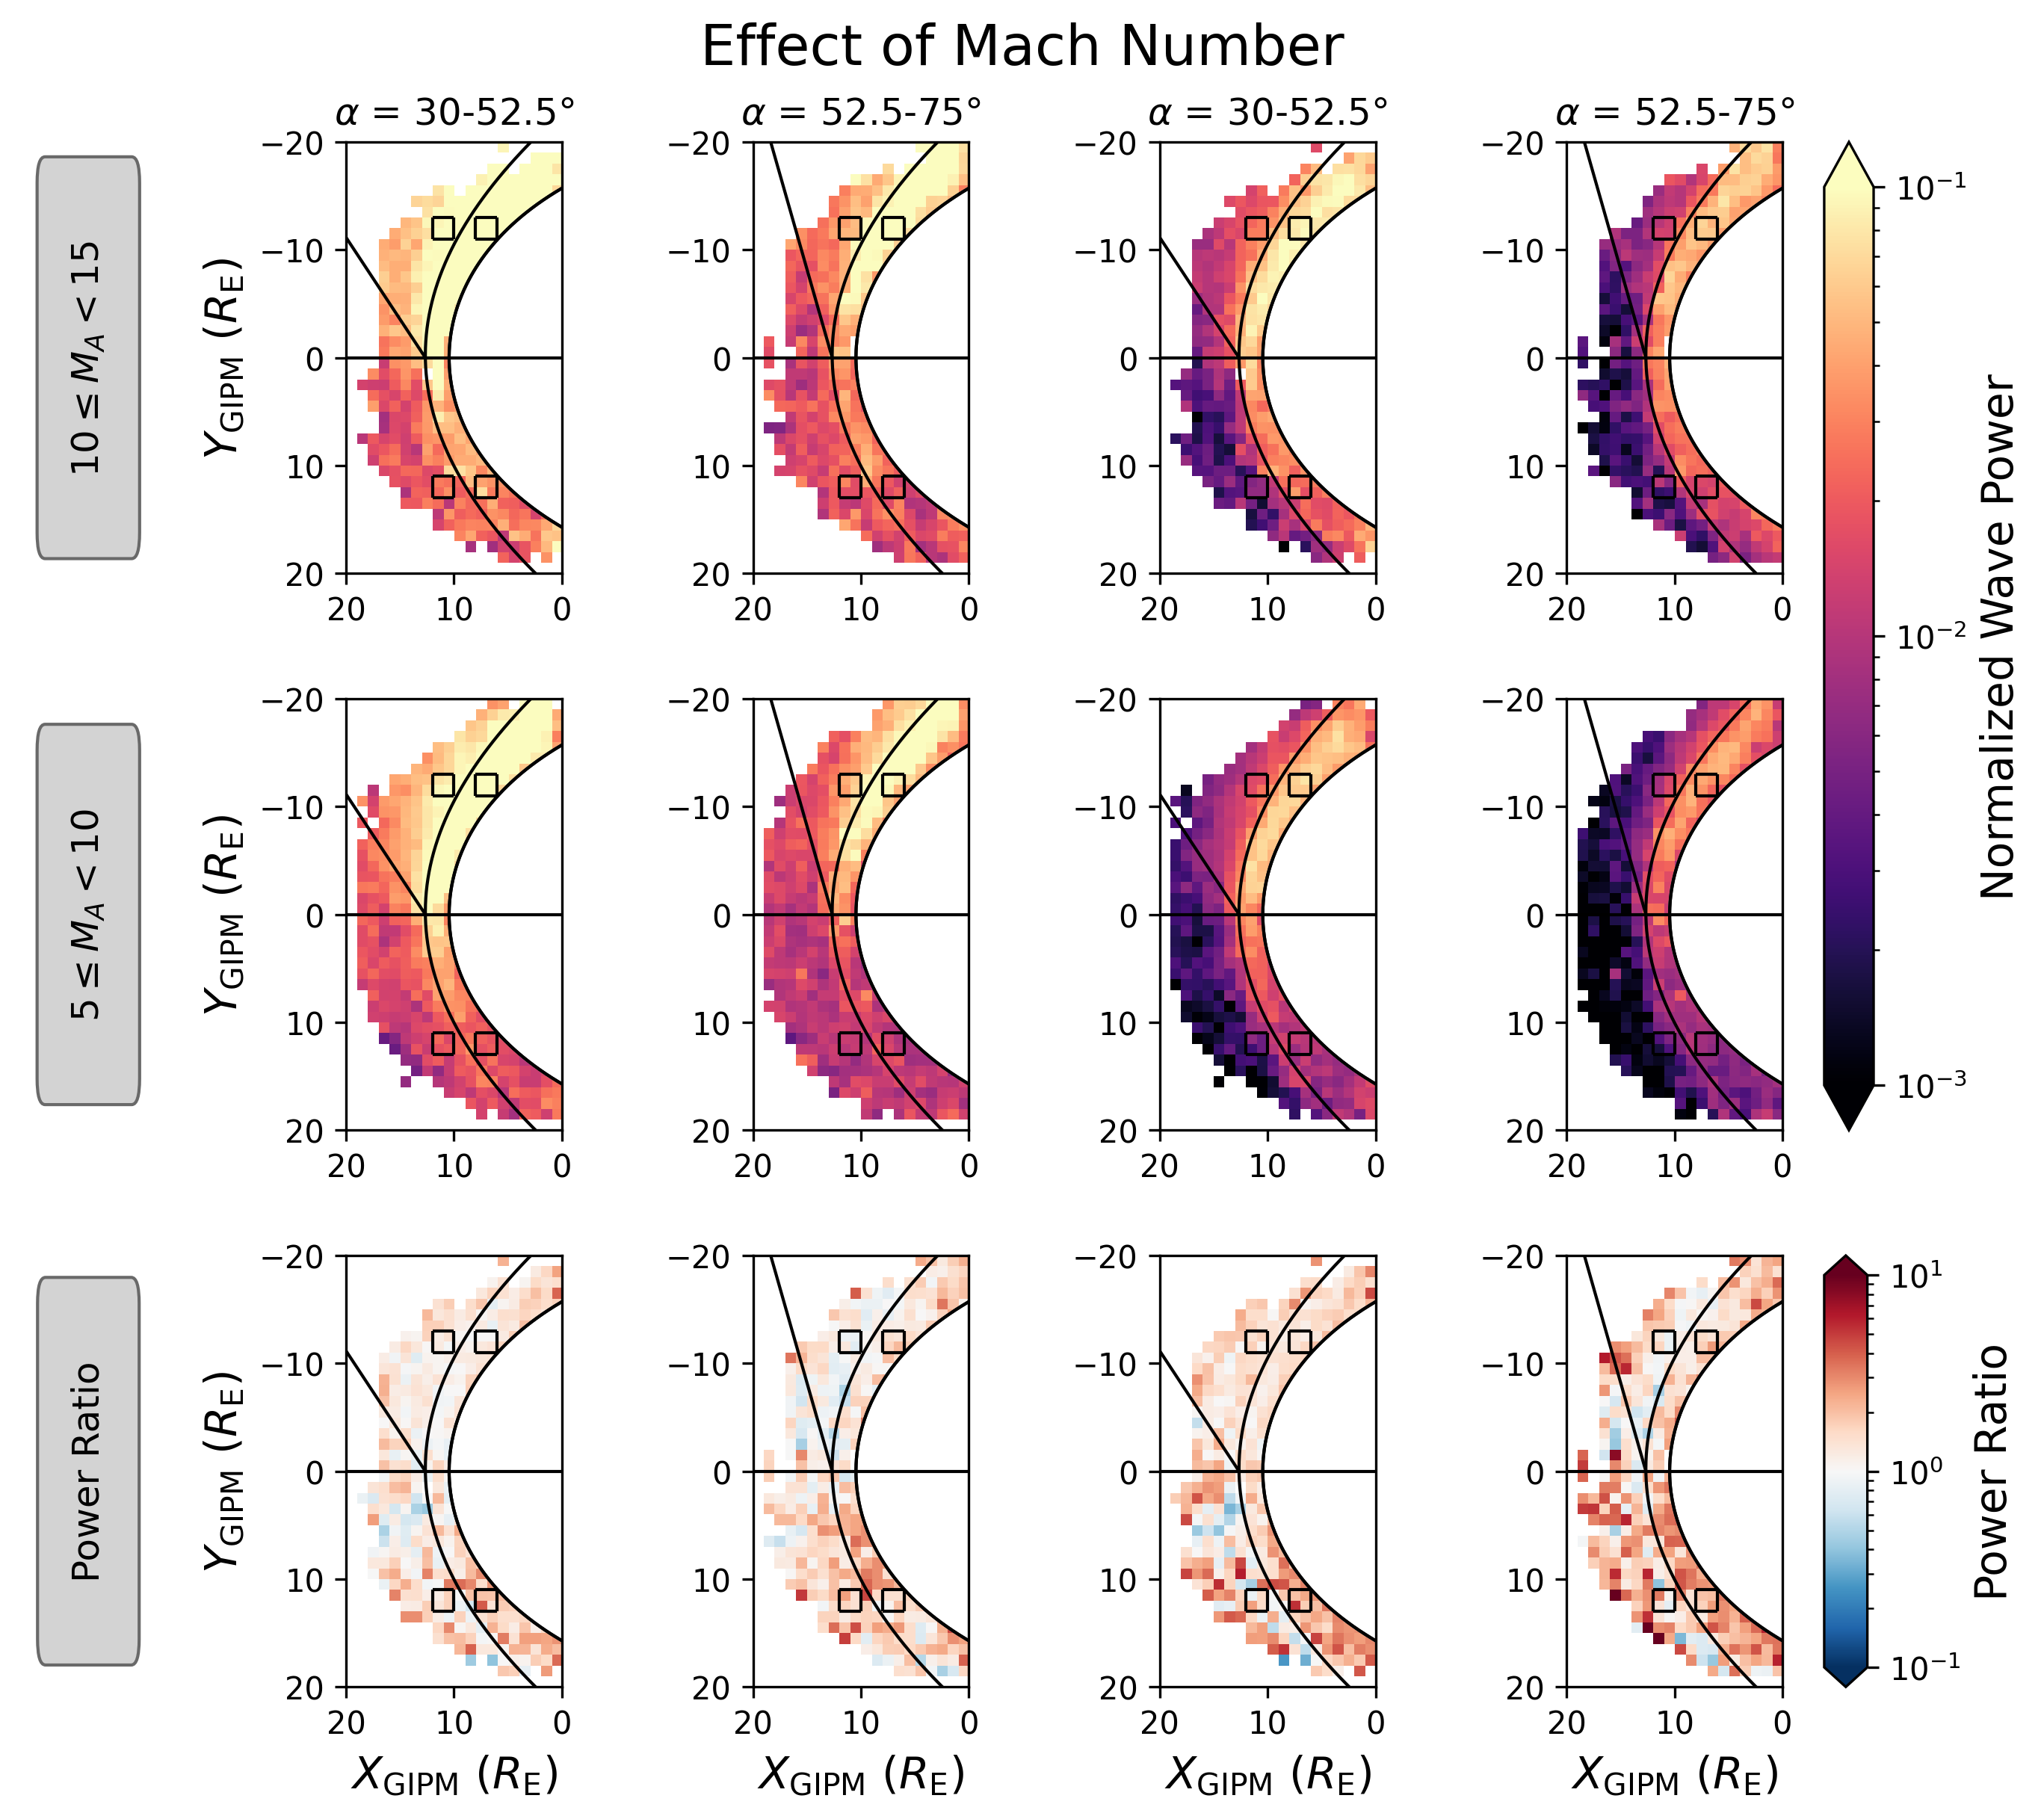

In [50]:
#Wider CA bin plot, with transverse & compressive in same batch

#new angle titles!

angle_titles_wide = ["30-52.5°", "52.5-75°", "30-52.5°", "52.5-75°"]
# -------------------------------
# CREATE FIGURE + GRID
# -------------------------------

fig = plt.figure(figsize=(9, 8), dpi=300, constrained_layout=True)
gs = fig.add_gridspec(
    nrows=3, ncols=5,      # 1 column for patch labels
    width_ratios=[0.35, 1, 1, 1, 1],  # label column thinner
    wspace=0.05, hspace=0.1
)

fig.suptitle("Effect of Mach Number", fontsize=18)
plt.rcParams['axes.labelsize'] = 14

# Row labels (top row → bottom row)
row_labels = [
    r'$10 \leq M_A < 15$',
    r'$5 \leq M_A < 10$',
    r'Power Ratio'
]

# -------------------------------
# MAKE AXES FOR THE 3×5 PANELS
# -------------------------------
axs = []
for r in range(3):
    plot_row_axes = []
    gs_row = r      
    for c in range(4):
        ax = fig.add_subplot(gs[gs_row, c + 1])
        plot_row_axes.append(ax)
    axs.append(plot_row_axes)

# -------------------------------
# Patch Labels (Rounded Boxes)
# -------------------------------

for r in range(3):
    ax_patch = fig.add_subplot(gs[r, 0])
    ax_patch.set_axis_off()

    # -- Draw text first so we can query its bounding box --
    txt = ax_patch.text(
        0.5, 0.5,                     # centered in the Axes
        row_labels[r],
        ha="center",
        va="center",
        fontsize=12,
        transform=ax_patch.transAxes,
        rotation='vertical'
    )

    fig.canvas.draw()  # required to obtain correct text bounding box

    # -- Convert text bounding box from display to Axes coordinates --
    renderer = fig.canvas.get_renderer()
    bbox = txt.get_window_extent(renderer=renderer)
    bbox_axes = TransformedBbox(
        bbox, ax_patch.transAxes.inverted()
    )

    # Add some padding around the text
    pad_x = 0.04   # fractional padding in axes coordinates
    pad_y = 0.01

    x0 = bbox_axes.x0 - pad_x
    y0 = bbox_axes.y0 - pad_y
    width = bbox_axes.width + 2 * pad_x
    height = bbox_axes.height + 2 * pad_y

    # -- Rounded box placed behind the text --
    box = FancyBboxPatch(
        (x0, y0),
        width,
        height,
        boxstyle="round,pad=0.2,rounding_size=0.06",
        fc="lightgrey",
        ec="dimgrey",
        linewidth=1,
        mutation_aspect=1,
        transform=ax_patch.transAxes,
        zorder=0.5,
    )
    ax_patch.add_patch(box)

    # Move text above box
    txt.set_zorder(1)


# -------------------------------
# COLORMAP
# -------------------------------

powercmp = 'magma'
power_norm = colors.LogNorm(vmin=0.001, vmax=0.1)
ratio_cmp = 'RdBu_r'
ratio_norm = colors.LogNorm(vmin=0.1, vmax=10)

# -------------------------------
# PLOT ALL PANELS
# -------------------------------

for col in range(4):                         # angle class
    title = angle_titles_wide[col]
    slope = line_slopes[title]
    y_e = -x_e * slope

    for row in range(3):                     # mach no. class
        ax = axs[row][col]

        # Draw contour, magnetopause
        draw_background(ax, Xgipm[:, :, 0], Ygipm[:, :, 0], f[:, :, 0],
                        X_shue, R_shue)

        # Histogram for this cell
        hist = wide_angle_blocks[row][col]

        # angle line parameters: (x_s, x_e, y_s, y_e)
        angle_line = (x_s, x_e, y_s, y_e)

        if row < 2:
            draw_heatmap(ax, hist, extent, powercmp, power_norm, angle_line)

        if row == 2:
            draw_heatmap(ax, hist, extent, ratio_cmp, ratio_norm, angle_line)

        mask_inside_magnetopause(ax, X_shue, R_shue)
        
        # redraw magnetopause boundary so it stays crisp
        ax.plot(X_shue, R_shue, 'k', linewidth=1)
        
        set_limits(ax)
        sample_indicators(ax)
        
        # Labels
        if col == 0:
            ax.set_ylabel("$Y_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")
        if row == 0:
            ax.set_title(rf'$\alpha$ = {title}', fontsize=12)
        if row == 2:
            ax.set_xlabel("$X_\\mathrm{GIPM}$ ($R_\\mathrm{E}$)")

# -------------------------------
# COLORBARS (TWO SEPARATE ON RIGHT)
# -------------------------------

from matplotlib.cm import ScalarMappable

# --- Scalar mappables (independent of any single subplot image)
sm_power = ScalarMappable(norm=power_norm, cmap=powercmp)
sm_power.set_array([])

sm_ratio = ScalarMappable(norm=ratio_norm, cmap=ratio_cmp)
sm_ratio.set_array([])

# --- Top two rows colourbar (wave power)
top_axes = axs[0] + axs[1]   # flatten row 0 and 1
cbar1 = fig.colorbar(
    sm_power,
    ax=top_axes,
    location='right',
    pad=0.02,
    extend='both'
)
cbar1.set_label('Normalized Wave Power')

# --- Bottom row colourbar (ratio)
bottom_axes = axs[2]
cbar2 = fig.colorbar(
    sm_ratio,
    ax=bottom_axes,
    location='right',
    aspect=10,
    pad=0.02,
    extend='both'
)
cbar2.set_label('Power Ratio')

cbar1.ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext())
cbar2.ax.yaxis.set_major_formatter(ticker.LogFormatterMathtext())


plt.show()


In [51]:
#now take averages (for 30-52.5 case only)

#filter dfs for FS, SW, QPARA MSH & QPERP MSH

#Foreshock

x_lim_fs = [10, 12]
y_lim_fs = [-13, -11]

#Solar Wind

x_lim_sw = [10, 12]
y_lim_sw = [11, 13]


#Qpara Magnetosheath

x_lim_para_msh = [6, 8]
y_lim_para_msh = [-13, -11]


#Qperp Magnetosheath

x_lim_perp_msh = [6, 8]
y_lim_perp_msh = [11, 13]


#now get masks for df_30_52_5_10, df_30_52_10_15

fs_mask_10_15 = df_30_52_10_15.loc[(df_30_52_10_15['GIPM X (OMNI mean)'] > x_lim_fs[0]) & (df_30_52_10_15['GIPM X (OMNI mean)'] < x_lim_fs[1]) & (df_30_52_10_15['GIPM Y (OMNI mean)'] > y_lim_fs[0]) & (df_30_52_10_15['GIPM Y (OMNI mean)'] < y_lim_fs[1])]
fs_mask_5_10 = df_30_52_5_10.loc[(df_30_52_5_10['GIPM X (OMNI mean)'] > x_lim_fs[0]) & (df_30_52_5_10['GIPM X (OMNI mean)'] < x_lim_fs[1]) & (df_30_52_5_10['GIPM Y (OMNI mean)'] > y_lim_fs[0]) & (df_30_52_5_10['GIPM Y (OMNI mean)'] < y_lim_fs[1])]

sw_mask_10_15 = df_30_52_10_15.loc[(df_30_52_10_15['GIPM X (OMNI mean)'] > x_lim_sw[0]) & (df_30_52_10_15['GIPM X (OMNI mean)'] < x_lim_sw[1]) & (df_30_52_10_15['GIPM Y (OMNI mean)'] > y_lim_sw[0]) & (df_30_52_10_15['GIPM Y (OMNI mean)'] < y_lim_sw[1])]
sw_mask_5_10 = df_30_52_5_10.loc[(df_30_52_5_10['GIPM X (OMNI mean)'] > x_lim_sw[0]) & (df_30_52_5_10['GIPM X (OMNI mean)'] < x_lim_sw[1]) & (df_30_52_5_10['GIPM Y (OMNI mean)'] > y_lim_sw[0]) & (df_30_52_5_10['GIPM Y (OMNI mean)'] < y_lim_sw[1])]

para_msh_mask_10_15 = df_30_52_10_15.loc[(df_30_52_10_15['GIPM X (OMNI mean)'] > x_lim_para_msh[0]) & (df_30_52_10_15['GIPM X (OMNI mean)'] < x_lim_para_msh[1]) & (df_30_52_10_15['GIPM Y (OMNI mean)'] > y_lim_para_msh[0]) & (df_30_52_10_15['GIPM Y (OMNI mean)'] < y_lim_para_msh[1])]
para_msh_mask_5_10 = df_30_52_5_10.loc[(df_30_52_5_10['GIPM X (OMNI mean)'] > x_lim_para_msh[0]) & (df_30_52_5_10['GIPM X (OMNI mean)'] < x_lim_para_msh[1]) & (df_30_52_5_10['GIPM Y (OMNI mean)'] > y_lim_para_msh[0]) & (df_30_52_5_10['GIPM Y (OMNI mean)'] < y_lim_para_msh[1])]

perp_msh_mask_10_15 = df_30_52_10_15.loc[(df_30_52_10_15['GIPM X (OMNI mean)'] > x_lim_perp_msh[0]) & (df_30_52_10_15['GIPM X (OMNI mean)'] < x_lim_perp_msh[1]) & (df_30_52_10_15['GIPM Y (OMNI mean)'] > y_lim_perp_msh[0]) & (df_30_52_10_15['GIPM Y (OMNI mean)'] < y_lim_perp_msh[1])]
perp_msh_mask_5_10 = df_30_52_5_10.loc[(df_30_52_5_10['GIPM X (OMNI mean)'] > x_lim_perp_msh[0]) & (df_30_52_5_10['GIPM X (OMNI mean)'] < x_lim_perp_msh[1]) & (df_30_52_5_10['GIPM Y (OMNI mean)'] > y_lim_perp_msh[0]) & (df_30_52_5_10['GIPM Y (OMNI mean)'] < y_lim_perp_msh[1])]


In [58]:
#Calculate & print ratios!

print("\033[1m" + 'Foreshock:' + "\033[0;0m") 
print('Mean M_A, high:', fs_mask_10_15['M_A (mean)'].mean(),'Mean Transverse Power, high M_A:', fs_mask_10_15['ULF Band Normalised Transverse Power'].mean() ,'Mean Compressive, high M_A:', fs_mask_10_15['ULF Band Normalised Compressive Power'].mean())
print('Mean M_A, low:', fs_mask_5_10['M_A (mean)'].mean(),'Mean Transverse Power, low M_A:', fs_mask_5_10['ULF Band Normalised Transverse Power'].mean() ,'Mean Compressive, low M_A:', fs_mask_5_10['ULF Band Normalised Compressive Power'].mean())
print('Ratio, M_A Change:', fs_mask_10_15['M_A (mean)'].mean()/fs_mask_5_10['M_A (mean)'].mean())
print('Ratio, Transverse Change:', fs_mask_10_15['ULF Band Normalised Transverse Power'].mean()/fs_mask_5_10['ULF Band Normalised Transverse Power'].mean())
print('Ratio, Compressive Change:', fs_mask_10_15['ULF Band Normalised Compressive Power'].mean()/fs_mask_5_10['ULF Band Normalised Compressive Power'].mean())

print('')
print("\033[1m" + 'Solar Wind:' + "\033[0;0m") 
print('Mean M_A, high:', sw_mask_10_15['M_A (mean)'].mean(),'Mean Transverse Power, high M_A:', sw_mask_10_15['ULF Band Normalised Transverse Power'].mean() ,'Mean Compressive, high M_A:', sw_mask_10_15['ULF Band Normalised Compressive Power'].mean())
print('Mean M_A, low:', sw_mask_5_10['M_A (mean)'].mean(),'Mean Transverse Power, low M_A:', sw_mask_5_10['ULF Band Normalised Transverse Power'].mean() ,'Mean Compressive, low M_A:', sw_mask_5_10['ULF Band Normalised Compressive Power'].mean())
print('Ratio, M_A Change:', sw_mask_10_15['M_A (mean)'].mean()/sw_mask_5_10['M_A (mean)'].mean())
print('Ratio, Transverse Change:', sw_mask_10_15['ULF Band Normalised Transverse Power'].mean()/sw_mask_5_10['ULF Band Normalised Transverse Power'].mean())
print('Ratio, Compressive Change:', sw_mask_10_15['ULF Band Normalised Compressive Power'].mean()/sw_mask_5_10['ULF Band Normalised Compressive Power'].mean())

print('')
print("\033[1m" + 'Solar Wind:' + "\033[0;0m") 
print('Mean M_A, high:', sw_mask_10_15['M_A (mean)'].mean(),'Mean Transverse Power, high M_A:', sw_mask_10_15['ULF Band Normalised Transverse Power'].mean() ,'Mean Compressive, high M_A:', sw_mask_10_15['ULF Band Normalised Compressive Power'].mean())
print('Mean M_A, low:', sw_mask_5_10['M_A (mean)'].mean(),'Mean Transverse Power, low M_A:', sw_mask_5_10['ULF Band Normalised Transverse Power'].mean() ,'Mean Compressive, low M_A:', sw_mask_5_10['ULF Band Normalised Compressive Power'].mean())
print('Ratio, M_A Change:', sw_mask_10_15['M_A (mean)'].mean()/sw_mask_5_10['M_A (mean)'].mean())
print('Ratio, Transverse Change:', sw_mask_10_15['ULF Band Normalised Transverse Power'].mean()/sw_mask_5_10['ULF Band Normalised Transverse Power'].mean())
print('Ratio, Compressive Change:', sw_mask_10_15['ULF Band Normalised Compressive Power'].mean()/sw_mask_5_10['ULF Band Normalised Compressive Power'].mean())

Foreshock:
Mean M_A, high: 11.90280221911856 Mean Transverse Power, high M_A: 0.1111966604118203 Mean Compressive, high M_A: 0.02739537261735202
Mean M_A, low: 7.778605115226898 Mean Transverse Power, low M_A: 0.09589236668805341 Mean Compressive, low M_A: 0.01950908352369354
Ratio, M_A Change: 1.5301975152098155
Ratio, Transverse Change: 1.1595986651737686
Ratio, Compressive Change: 1.404236779451002

Solar Wind:
Mean M_A, high: 12.026044664660736 Mean Transverse Power, high M_A: 0.027411864787484006 Mean Compressive, high M_A: 0.0065663363979695305
Mean M_A, low: 7.587410335075254 Mean Transverse Power, low M_A: 0.01891761306323462 Mean Compressive, low M_A: 0.004566041593947442
Ratio, M_A Change: 1.584999905576012
Ratio, Transverse Change: 1.4490128694278834
Ratio, Compressive Change: 1.4380807232841675
